In [1]:
import numpy as np
import pandas as pd
# lightgbm
import lightgbm as lgb
import warnings
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

warnings.filterwarnings('ignore')

# import data

In [2]:
data = pd.read_excel('./AML and ATF Modelling Assignment data_std_Updated.xlsx', sheet_name='data')

In [3]:
data_dictionary = pd.read_excel('./AML and ATF Modelling Assignment data_std_Updated.xlsx',
                                sheet_name='data dictionary')

In [4]:
data.describe()

,cust_tenure,cust_cdn_resident,prod_sav,prod_primary_sav_cnt,prod_cda,prod_primary_cda_cnt,prod_mor,prod_primary_mor_cnt,prod_llc,prod_primary_llc_cnt,...,max_acct_num,acct_type_num,tot_acct_num.1,tot_cross_border_val_12m,tot_cash_val_5m,tot_cross_border_cnt_12m,tot_cash_cnt_5m,avg_cash_5m,avg_wire_12m,rating
count,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,...,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,588.000000
mean,-4.833624e-17,-3.141856e-16,-1.299036e-16,-6.042030e-18,7.250436e-17,1.419877e-16,-6.042030e-18,-4.833624e-17,4.229421e-17,-1.510508e-16,...,6.042030e-18,-3.323117e-17,3.021015e-17,-5.286776e-17,-6.042030e-18,4.531523e-18,-1.812609e-17,-3.625218e-17,7.250436e-17,0.336735
std,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,...,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,0.472996
min,-1.038455e+00,-4.312772e+00,-8.275347e-01,-6.774907e-01,-1.187365e+00,-9.899530e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,-1.261487e+00,-1.573081e+00,-1.084513e+00,-1.287247e-01,-3.784918e-01,-2.914573e-01,-8.355407e-01,-4.002812e-01,-1.409628e-01,0.000000
25%,-8.234744e-01,2.318694e-01,-8.275347e-01,-6.774907e-01,-1.187365e+00,-9.899530e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,-6.021500e-01,-8.744621e-01,-7.844219e-01,-1.287247e-01,-3.784918e-01,-2.914573e-01,-8.355407e-01,-4.002812e-01,-1.409628e-01,0.000000
50%,-4.450379e-01,2.318694e-01,-8.275347e-01,-6.774907e-01,8.422009e-01,2.978620e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,-6.021500e-01,-1.758429e-01,-1.842396e-01,-1.287247e-01,-3.200575e-01,-2.914573e-01,-4.470605e-01,-2.928083e-01,-1.409628e-01,0.000000
75%,6.744713e-01,2.318694e-01,1.208408e+00,5.482463e-01,8.422009e-01,2.978620e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,5.718743e-02,5.227763e-01,4.159426e-01,-1.287247e-01,-8.232960e-03,-2.914573e-01,6.212600e-01,2.436413e-02,-1.409628e-01,1.000000
max,3.090299e+00,2.318694e-01,1.208408e+00,5.451195e+00,8.422009e-01,4.161307e+00,2.557042e+00,8.514069e+00,1.840668e+00,4.989118e+00,...,7.309899e+00,2.618634e+00,6.117674e+00,1.406890e+01,1.426850e+01,9.874967e+00,4.732675e+00,1.165024e+01,1.561887e+01,1.000000


# Data EDA

In [5]:
data_dictionary

,Type,Data Element,Description
0,ID,cust_id_masked,Unique Customer ID
1,Target,rating,"Ratings (1 - high risk, 0 - moderate or low risk)"
2,Feature,cust_tenure,Number of years the customer has been with Sco...
3,Feature,cust_cdn_resident,Binary indicator whether the customer resides ...
4,Feature,prod_sav,Binary indicator for savings account
...,...,...,...
146,Feature,tot_cash_val_5m,Total amount of cash transaction (withdrawal a...
147,Feature,tot_cross_border_cnt_12m,Total count of cross-border wire transaction (...
148,Feature,tot_cash_cnt_5m,Total count of cash transaction (withdrawal an...
149,Feature,avg_cash_5m,Average of cash transaction (withdrawal and de...


In [6]:
data['rating'].value_counts()

0    390
1    198
Name: rating, dtype: int64

In [7]:
data[
    'cust_id_masked'].unique()  # the number of unique customers = num of rows, we can safely drop this column as it is not useful

array(['004f8eab603ba30ea8fffd64ef39d5a990aff66b35f447150a2c09e54566b2ba',
       '00a38e35a8350be0d0d2ef2c7c40de54f049ff8359b54ed72452496f8bdeec93',
       '00d442a125b121bcd9e17ae58fdce2e7ae3513375afb2a08c1014d50d7074933',
       '0114b5ce76aa3c09c460620cc19f1a77087ede3c326021c4ad59d2fe49abb825',
       '015a0ba1cb86c4e46bb01f8ed501254cfb7422e240583f2e643a80ef97368ef5',
       '02f72cff71eeda1faaee79504b187db91491a12a62a5ab3a6288e6af27d124a7',
       '036f4bd2a05492d4c1f607b5cec9d831d9584ca69715e9cbe25a5a5c0090a8c3',
       '03d5fc5a8f1cf8b937916b12a5e9b5351200eaf8af8d44943e0a3d66e111438c',
       '03ec6ee67c63b7a5102dc8720742194894aaf5f8f327b92108e42fdb9f84e422',
       '04adacd9e573d85f5eec6b907d1a30b0d9e964a4faa037d188a68428a207b868',
       '0574ed27d7c7a504496fcabf1e20061bfafc1e8e2ecbc280d3cf4c78500c2241',
       '05a5fb44fc52346be364bb991df22dc9f1ae94a55ce6986c8f46a631b86b6f70',
       '063f640cd7552ee9b28b8346af39d7c2a755ebc764323a821784508f44ac2361',
       '06bb3c1535f6fb8f6

med doesn't contain too much information so we discard it, and dimension reduce to only high risk and low risk, same as what the target did. also we notice geo domicile risk is the same as the geo mail risk, so we can discard it as well 

In [8]:
mutual_info_classif(data.loc[:, ['geo_mail_addr_country_rate_high', 'geo_mail_addr_country_rate_low',
                                 'geo_mail_addr_country_rate_med']], data['rating'], discrete_features=True)

array([0.02405594, 0.02282895, 0.00038627])

In [9]:
mutual_info_classif(
    data.loc[:, ['geo_domicile_country_rate_high', 'geo_domicile_country_rate_low', 'geo_domicile_country_rate_med']],
    data['rating'], discrete_features=True)

array([0.02405594, 0.02282895, 0.00038627])

In [10]:
data['geo_mail_addr_country_rate_high'].corr(data['geo_domicile_country_rate_high'])

1.0

In [11]:
data['geo_mail_addr_country_rate_high'].corr(data['geo_mail_addr_country_rate_low'])

-0.9251724928930445

In [12]:
data['geo_domicile_country_rate_high'].corr(data['geo_domicile_country_rate_low'])

-0.9251724928930445

## 29 to 49 cash related

In [13]:
data.iloc[:, 29:49].columns

Index(['txn_cash_in_val_5m', 'txn_cash_out_val_5m', 'txn_cash_in_cnt_5m',
       'txn_cash_out_cnt_5m', 'txn_cash_in_avg_5m', 'txn_cash_out_avg_5m',
       'txn_large_in_cash_val_10k_5m', 'txn_large_out_cash_val_10k_5m',
       'txn_large_in_cash_val_9k_5m', 'txn_large_out_cash_val_9k_5m',
       'txn_cash_in_val_3m', 'txn_cash_out_val_3m', 'txn_cash_in_cnt_3m',
       'txn_cash_out_cnt_3m', 'txn_cash_in_avg_3m', 'txn_cash_out_avg_3m',
       'txn_large_in_cash_val_10k_3m', 'txn_large_out_cash_val_10k_3m',
       'txn_large_in_cash_val_9k_3m', 'txn_large_out_cash_val_9k_3m'],
      dtype='object')

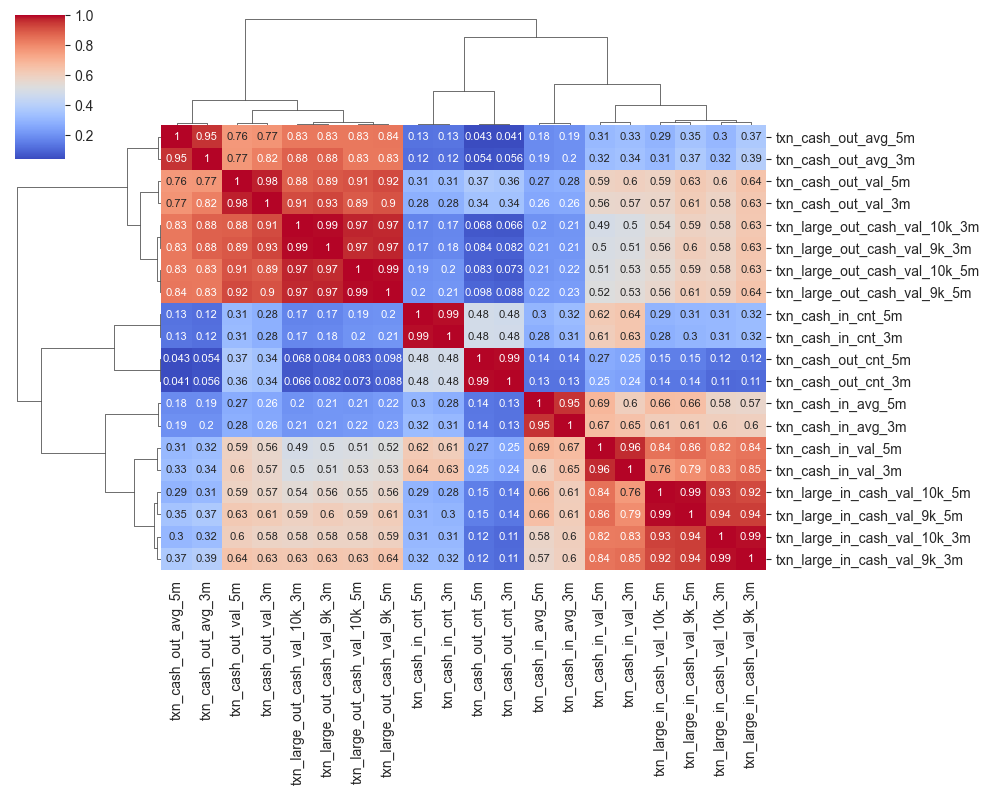

In [14]:
# Create the clustermap with heatmap and dendrogram
sns.clustermap(data.iloc[:, 29:49].corr(), method='ward', cmap='coolwarm', figsize=(10, 8), annot=True,
               annot_kws={'size': 8})

plt.show()

In [15]:
# notice there are several highly correlated features: 
# txn_cash_out_avg_5m, txn_cash_out_avg_3m,
# txn_cash_out_val_5m, txn_cash_out_val_3m,
# we deal with them by calculating the slop of the trend and delete one of the original data
temp = data.loc[:, ['txn_cash_out_avg_5m', 'txn_cash_out_avg_3m', 'txn_cash_out_val_5m', 'txn_cash_out_val_3m']]
temp['cash_out_trend'] = ((data['txn_cash_out_avg_5m'] - data['txn_cash_out_avg_3m']) / 2 + (
        data['txn_cash_out_val_5m'] - data['txn_cash_out_val_3m']) / 2) / 2
pd.DataFrame(mutual_info_classif(temp, data['rating'], discrete_features=True), index=temp.columns,
             columns=['info_gain'])

,info_gain
txn_cash_out_avg_5m,0.331011
txn_cash_out_avg_3m,0.318604
txn_cash_out_val_5m,0.330699
txn_cash_out_val_3m,0.314927
cash_out_trend,0.352348


In [16]:
temp.corr()

,txn_cash_out_avg_5m,txn_cash_out_avg_3m,txn_cash_out_val_5m,txn_cash_out_val_3m,cash_out_trend
txn_cash_out_avg_5m,1.000000,0.951783,0.762629,0.771991,0.081657
txn_cash_out_avg_3m,0.951783,1.000000,0.767623,0.819139,-0.209595
txn_cash_out_val_5m,0.762629,0.767623,1.000000,0.977162,0.037501
txn_cash_out_val_3m,0.771991,0.819139,0.977162,1.000000,-0.147082
cash_out_trend,0.081657,-0.209595,0.037501,-0.147082,1.000000


In [17]:
# txn_large_out_cash_val_10k_3m, txn_large_out_cash_val_9k_3m,
# txn_large_out_cash_val_10k_5m, txn_large_out_cash_val_9k_5m,
temp = data.loc[:, ['txn_large_out_cash_val_10k_5m', 'txn_large_out_cash_val_10k_3m', 'txn_large_out_cash_val_9k_5m',
                    'txn_large_out_cash_val_9k_3m']]
temp['large_cash_avoid_mark_trend'] = ((data['txn_large_out_cash_val_10k_5m'] - data[
    'txn_large_out_cash_val_9k_5m']) / 2 + (data['txn_large_out_cash_val_10k_3m'] - data[
    'txn_large_out_cash_val_9k_3m']) / 2) / 2
temp['cash_out_trend'] = ((data['txn_cash_out_avg_5m'] - data['txn_cash_out_avg_3m']) / 2 + (
        data['txn_cash_out_val_5m'] - data['txn_cash_out_val_3m']) / 2) / 2
pd.DataFrame(mutual_info_classif(temp, data['rating'], discrete_features=True), index=temp.columns,
             columns=['info_gain'])

,info_gain
txn_large_out_cash_val_10k_5m,0.022381
txn_large_out_cash_val_10k_3m,0.016030
txn_large_out_cash_val_9k_5m,0.029482
txn_large_out_cash_val_9k_3m,0.021648
large_cash_avoid_mark_trend,0.030010
cash_out_trend,0.352348


In [18]:
temp.corr()

,txn_large_out_cash_val_10k_5m,txn_large_out_cash_val_10k_3m,txn_large_out_cash_val_9k_5m,txn_large_out_cash_val_9k_3m,large_cash_avoid_mark_trend,cash_out_trend
txn_large_out_cash_val_10k_5m,1.000000,0.972047,0.994633,0.966109,0.054576,0.034772
txn_large_out_cash_val_10k_3m,0.972047,1.000000,0.967489,0.994393,0.049071,-0.165689
txn_large_out_cash_val_9k_5m,0.994633,0.967489,1.000000,0.972031,-0.047838,0.034654
txn_large_out_cash_val_9k_3m,0.966109,0.994393,0.972031,1.000000,-0.055660,-0.168253
large_cash_avoid_mark_trend,0.054576,0.049071,-0.047838,-0.055660,1.000000,0.012945
cash_out_trend,0.034772,-0.165689,0.034654,-0.168253,0.012945,1.000000


In [19]:
# txn_cash_in_cnt_5m, txn_cash_in_cnt_3m,
temp = data.loc[:, ['txn_cash_in_cnt_5m', 'txn_cash_in_cnt_3m']]
temp['cash_in_cnt_trend'] = (data['txn_cash_in_cnt_5m'] - data['txn_cash_in_cnt_3m']) / 2
pd.DataFrame(mutual_info_classif(temp, data['rating'], discrete_features=True), index=temp.columns,
             columns=['info_gain'])

,info_gain
txn_cash_in_cnt_5m,0.022993
txn_cash_in_cnt_3m,0.010580
cash_in_cnt_trend,0.055381


In [20]:
temp.corr()

,txn_cash_in_cnt_5m,txn_cash_in_cnt_3m,cash_in_cnt_trend
txn_cash_in_cnt_5m,1.000000,0.992498,0.061246
txn_cash_in_cnt_3m,0.992498,1.000000,-0.061246
cash_in_cnt_trend,0.061246,-0.061246,1.000000


In [21]:
# txn_cash_out_cnt_5m, txn_cash_out_cnt_3m,
temp = data.loc[:, ['txn_cash_out_cnt_5m', 'txn_cash_out_cnt_3m']]
temp['cash_out_cnt_trend'] = (data['txn_cash_out_cnt_5m'] - data['txn_cash_out_cnt_3m']) / 2
pd.DataFrame(mutual_info_classif(temp, data['rating'], discrete_features=True), index=temp.columns,
             columns=['info_gain'])

,info_gain
txn_cash_out_cnt_5m,0.028290
txn_cash_out_cnt_3m,0.026054
cash_out_cnt_trend,0.079443


In [22]:
temp.corr()

,txn_cash_out_cnt_5m,txn_cash_out_cnt_3m,cash_out_cnt_trend
txn_cash_out_cnt_5m,1.000000,0.992730,0.060293
txn_cash_out_cnt_3m,0.992730,1.000000,-0.060293
cash_out_cnt_trend,0.060293,-0.060293,1.000000


In [23]:
# txn_cash_in_avg_5m, txn_cash_in_avg_3m,
temp = data.loc[:, ['txn_cash_in_avg_5m', 'txn_cash_in_avg_3m']]
temp['cash_in_avg_trend'] = (data['txn_cash_in_avg_5m'] - data['txn_cash_in_avg_3m']) / 2
pd.DataFrame(mutual_info_classif(temp, data['rating'], discrete_features=True), index=temp.columns,
             columns=['info_gain'])

,info_gain
txn_cash_in_avg_5m,0.327123
txn_cash_in_avg_3m,0.306784
cash_in_avg_trend,0.327123


In [24]:
temp.corr()

,txn_cash_in_avg_5m,txn_cash_in_avg_3m,cash_in_avg_trend
txn_cash_in_avg_5m,1.000000,0.953484,0.152505
txn_cash_in_avg_3m,0.953484,1.000000,-0.152505
cash_in_avg_trend,0.152505,-0.152505,1.000000


In [25]:
# txn_cash_in_val_5m, txn_cash_in_val_3m,
temp = data.loc[:, ['txn_cash_in_val_5m', 'txn_cash_in_val_3m']]
temp['cash_in_val_trend'] = (data['txn_cash_in_val_5m'] - data['txn_cash_in_val_3m']) / 2
pd.DataFrame(mutual_info_classif(temp, data['rating'], discrete_features=True), index=temp.columns,
             columns=['info_gain'])

,info_gain
txn_cash_in_val_5m,0.325108
txn_cash_in_val_3m,0.302411
cash_in_val_trend,0.327466


In [26]:
temp.corr()

,txn_cash_in_val_5m,txn_cash_in_val_3m,cash_in_val_trend
txn_cash_in_val_5m,1.000000,0.963451,0.135183
txn_cash_in_val_3m,0.963451,1.000000,-0.135183
cash_in_val_trend,0.135183,-0.135183,1.000000


In [27]:
# txn_large_in_cash_val_10k_3m, txn_large_in_cash_val_9k_3m,
# txn_large_in_cash_val_10k_5m, txn_large_in_cash_val_9k_5m,
temp = data.loc[:, ['txn_large_in_cash_val_10k_5m', 'txn_large_in_cash_val_10k_3m', 'txn_large_in_cash_val_9k_5m',
                    'txn_large_in_cash_val_9k_3m']]
temp['large_cash_in_avoid_mark_trend'] = ((data['txn_large_in_cash_val_10k_5m'] - data[
    'txn_large_in_cash_val_9k_5m']) / 2 + (data['txn_large_in_cash_val_10k_3m'] - data[
    'txn_large_in_cash_val_9k_3m']) / 2) / 2
pd.DataFrame(mutual_info_classif(temp, data['rating'], discrete_features=True), index=temp.columns,
             columns=['info_gain'])

,info_gain
txn_large_in_cash_val_10k_5m,0.052201
txn_large_in_cash_val_10k_3m,0.039720
txn_large_in_cash_val_9k_5m,0.059455
txn_large_in_cash_val_9k_3m,0.046895
large_cash_in_avoid_mark_trend,0.059455


In [28]:
temp.corr()

,txn_large_in_cash_val_10k_5m,txn_large_in_cash_val_10k_3m,txn_large_in_cash_val_9k_5m,txn_large_in_cash_val_9k_3m,large_cash_in_avoid_mark_trend
txn_large_in_cash_val_10k_5m,1.000000,0.932393,0.993406,0.919286,0.076662
txn_large_in_cash_val_10k_3m,0.932393,1.000000,0.936593,0.989680,0.023814
txn_large_in_cash_val_9k_5m,0.993406,0.936593,1.000000,0.939595,-0.037339
txn_large_in_cash_val_9k_3m,0.919286,0.989680,0.939595,1.000000,-0.119180
large_cash_in_avoid_mark_trend,0.076662,0.023814,-0.037339,-0.119180,1.000000


## 50 to -2: wires contain high or med or low

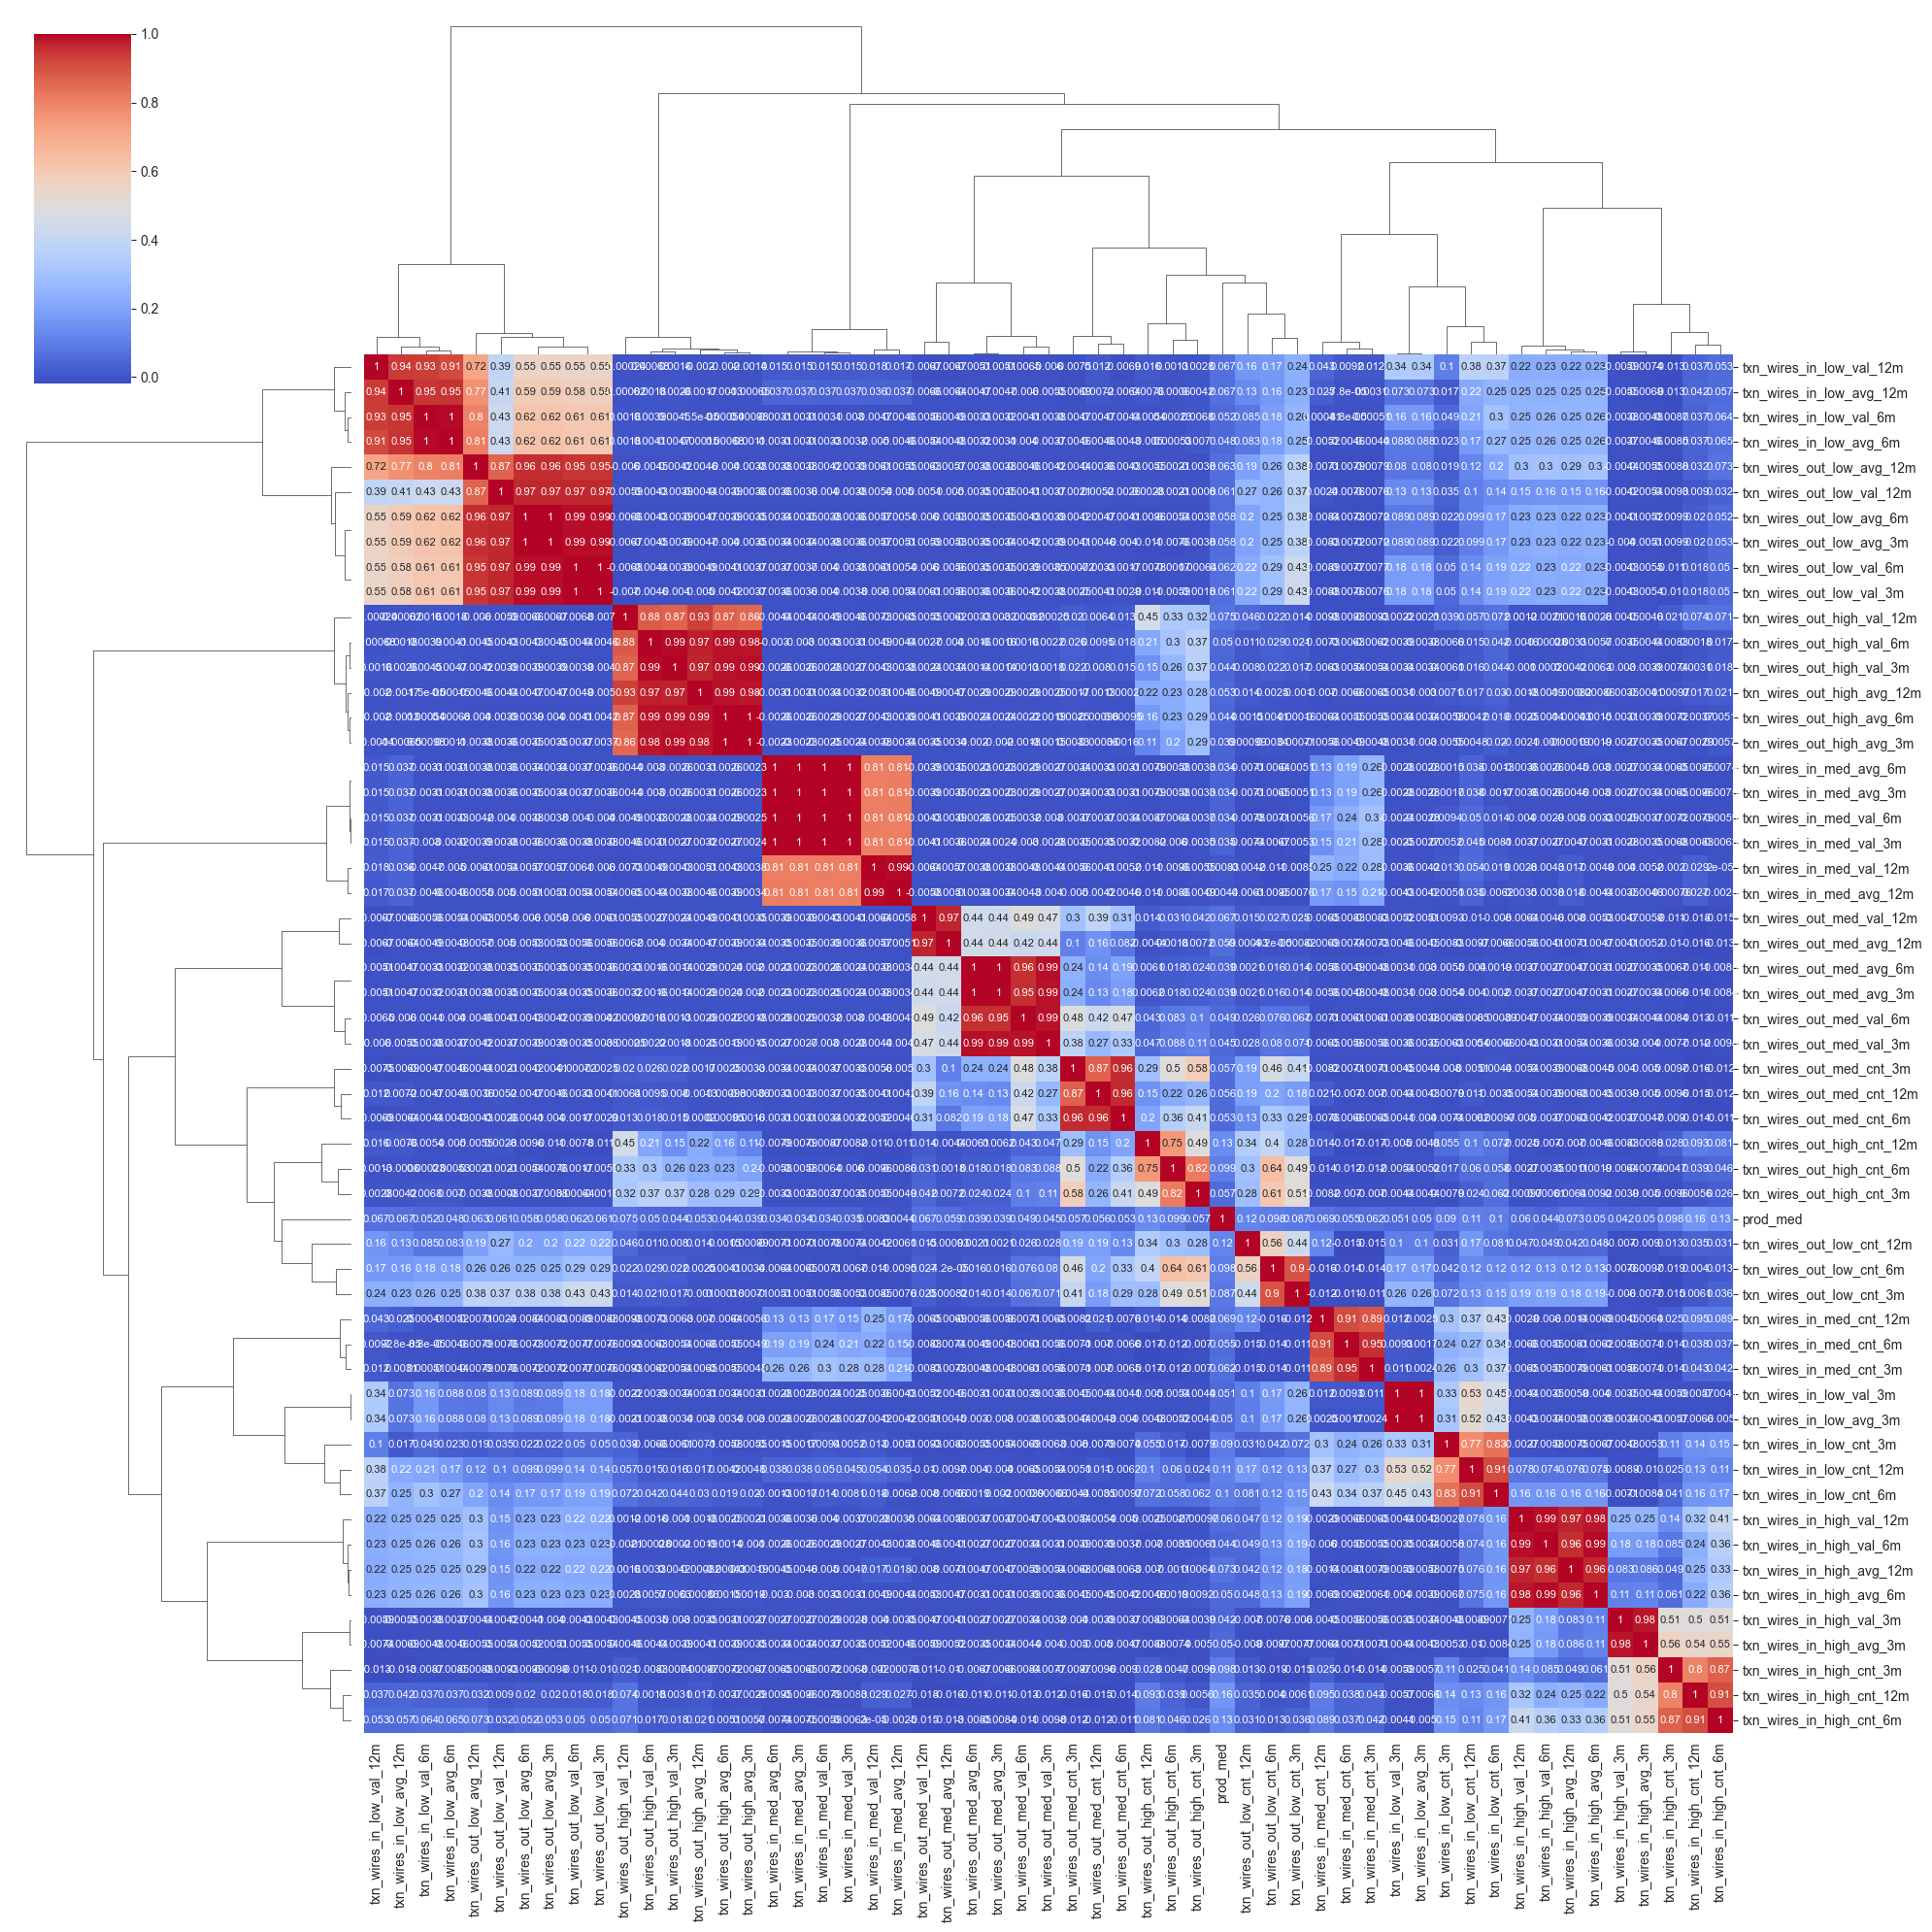

In [29]:
# slice data column name contain high or med or low
hml_condition = data.iloc[:, 50:-2].columns.str.contains('high|med|low')

sns.clustermap(data.iloc[:, 50:-2].loc[:, hml_condition].corr(), method='ward', cmap='coolwarm', figsize=(20, 20),
               annot=True, annot_kws={'size': 8})

plt.show()

In [30]:
pd.DataFrame(mutual_info_classif(data.iloc[:, 50:-2].loc[:, data.iloc[:, 50:-2].columns.str.contains('high|med|low')],
                                 data['rating'], discrete_features=True),
             index=data.iloc[:, 50:-2].loc[:, data.iloc[:, 50:-2].columns.str.contains('high|med|low')].columns,
             columns=[
                 'info_gain'])  # we can see that 'avg' and 'val' provides same information, we can drop avg because val captures all of the information.

,info_gain
txn_wires_in_high_val_12m,0.077639
txn_wires_out_high_val_12m,0.035585
txn_wires_in_med_val_12m,0.023299
txn_wires_out_med_val_12m,0.013100
txn_wires_in_low_val_12m,0.052478
txn_wires_out_low_val_12m,0.038834
txn_wires_in_high_cnt_12m,0.033921
txn_wires_out_high_cnt_12m,0.021781
txn_wires_in_med_cnt_12m,0.020941
txn_wires_out_med_cnt_12m,0.013100


In [31]:
hml_condition_with_avg_val = data.iloc[:, 50:-2].columns.str.contains('high|med|low') & data.iloc[:,
                                                                                        50:-2].columns.str.contains(
    'avg|val')

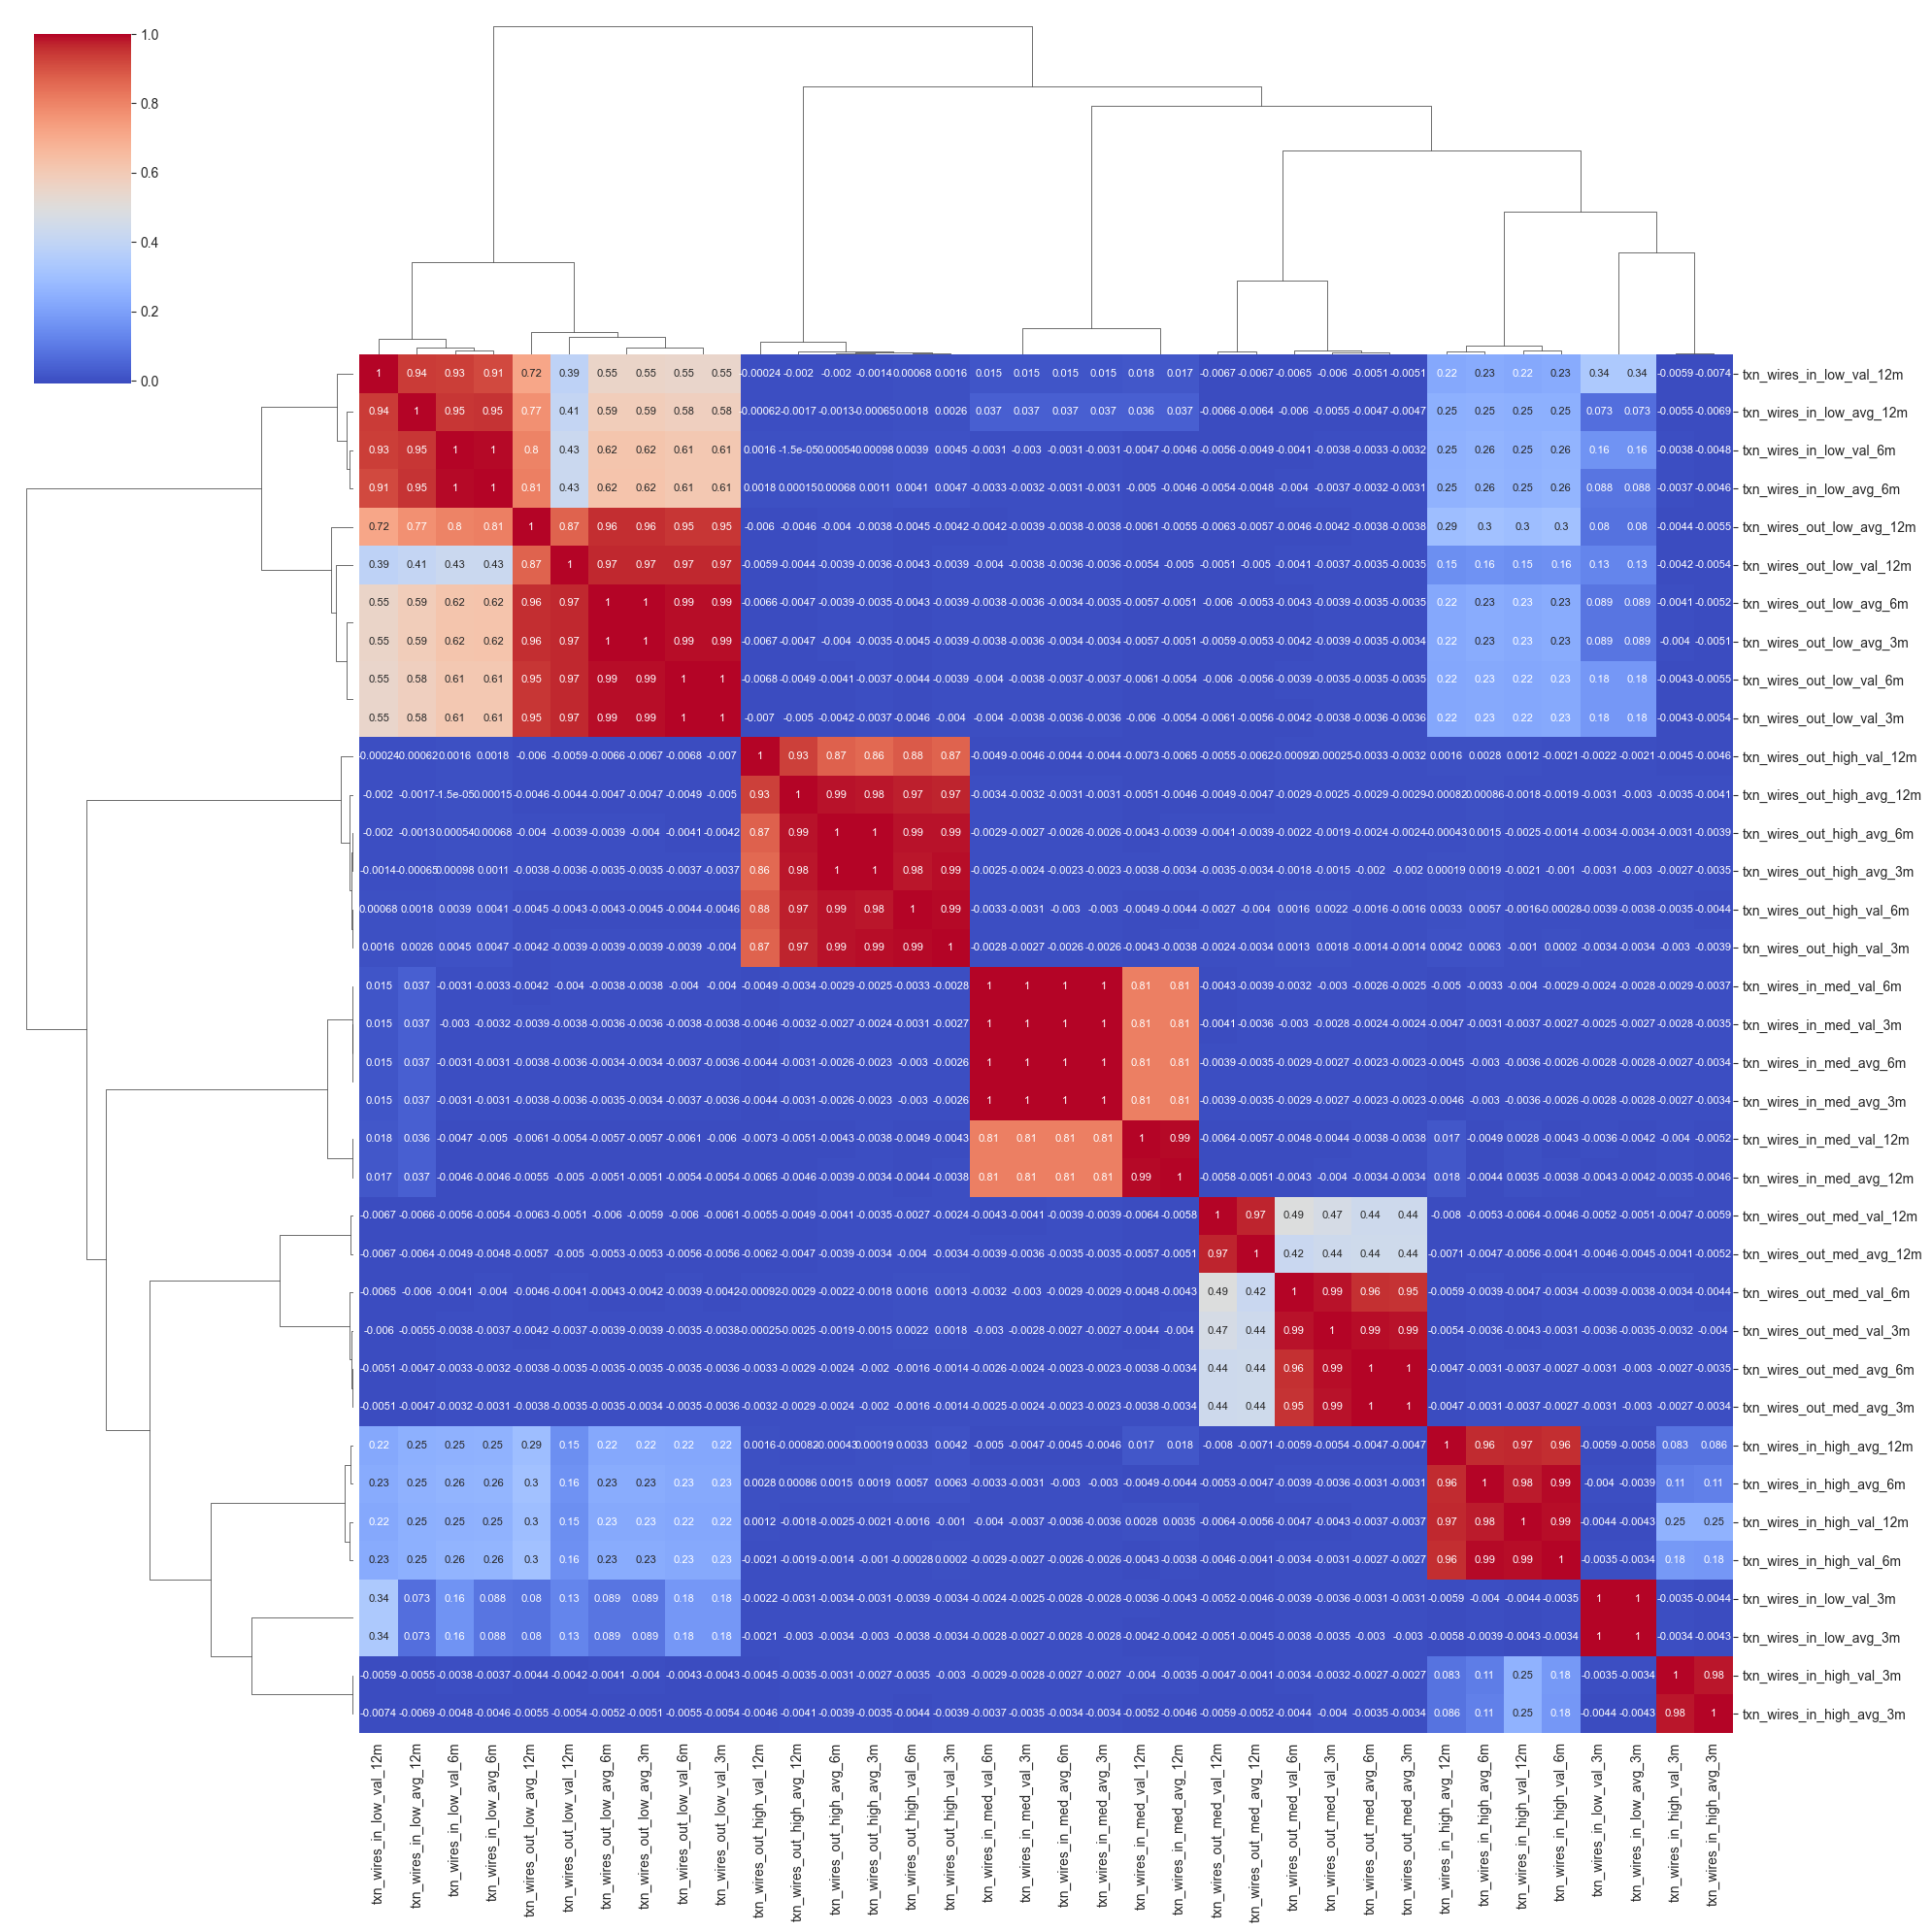

In [32]:
sns.clustermap(data.iloc[:, 50:-2].loc[:, hml_condition_with_avg_val].corr(), method='ward', cmap='coolwarm',
               figsize=(20, 20), annot=True, annot_kws={'size': 8})

In [33]:
pd.DataFrame(
    mutual_info_classif(data.iloc[:, 50:-2].loc[:, hml_condition_with_avg_val], data['rating'], discrete_features=True),
    index=data.iloc[:, 50:-2].loc[:, hml_condition_with_avg_val].columns, columns=['info_gain'])

,info_gain
txn_wires_in_high_val_12m,0.077639
txn_wires_out_high_val_12m,0.035585
txn_wires_in_med_val_12m,0.023299
txn_wires_out_med_val_12m,0.013100
txn_wires_in_low_val_12m,0.052478
txn_wires_out_low_val_12m,0.038834
txn_wires_in_high_avg_12m,0.077639
txn_wires_out_high_avg_12m,0.035585
txn_wires_in_med_avg_12m,0.023299
txn_wires_out_med_avg_12m,0.013100


In [34]:
hml_condition_with_avg = data.iloc[:, 50:-2].columns.str.contains('high|med|low') & data.iloc[:,
                                                                                    50:-2].columns.str.contains('avg')

In [35]:
data.iloc[:, 50:-2].loc[:, hml_condition_with_avg].columns  # we delete these 

Index(['txn_wires_in_high_avg_12m', 'txn_wires_out_high_avg_12m',
       'txn_wires_in_med_avg_12m', 'txn_wires_out_med_avg_12m',
       'txn_wires_in_low_avg_12m', 'txn_wires_out_low_avg_12m',
       'txn_wires_in_high_avg_6m', 'txn_wires_out_high_avg_6m',
       'txn_wires_in_med_avg_6m', 'txn_wires_out_med_avg_6m',
       'txn_wires_in_low_avg_6m', 'txn_wires_out_low_avg_6m',
       'txn_wires_in_high_avg_3m', 'txn_wires_out_high_avg_3m',
       'txn_wires_in_med_avg_3m', 'txn_wires_out_med_avg_3m',
       'txn_wires_in_low_avg_3m', 'txn_wires_out_low_avg_3m'],
      dtype='object')

In [36]:
hml_condition_with_val = data.iloc[:, 50:-2].columns.str.contains('high|med|low') & data.iloc[:,
                                                                                    50:-2].columns.str.contains('val')

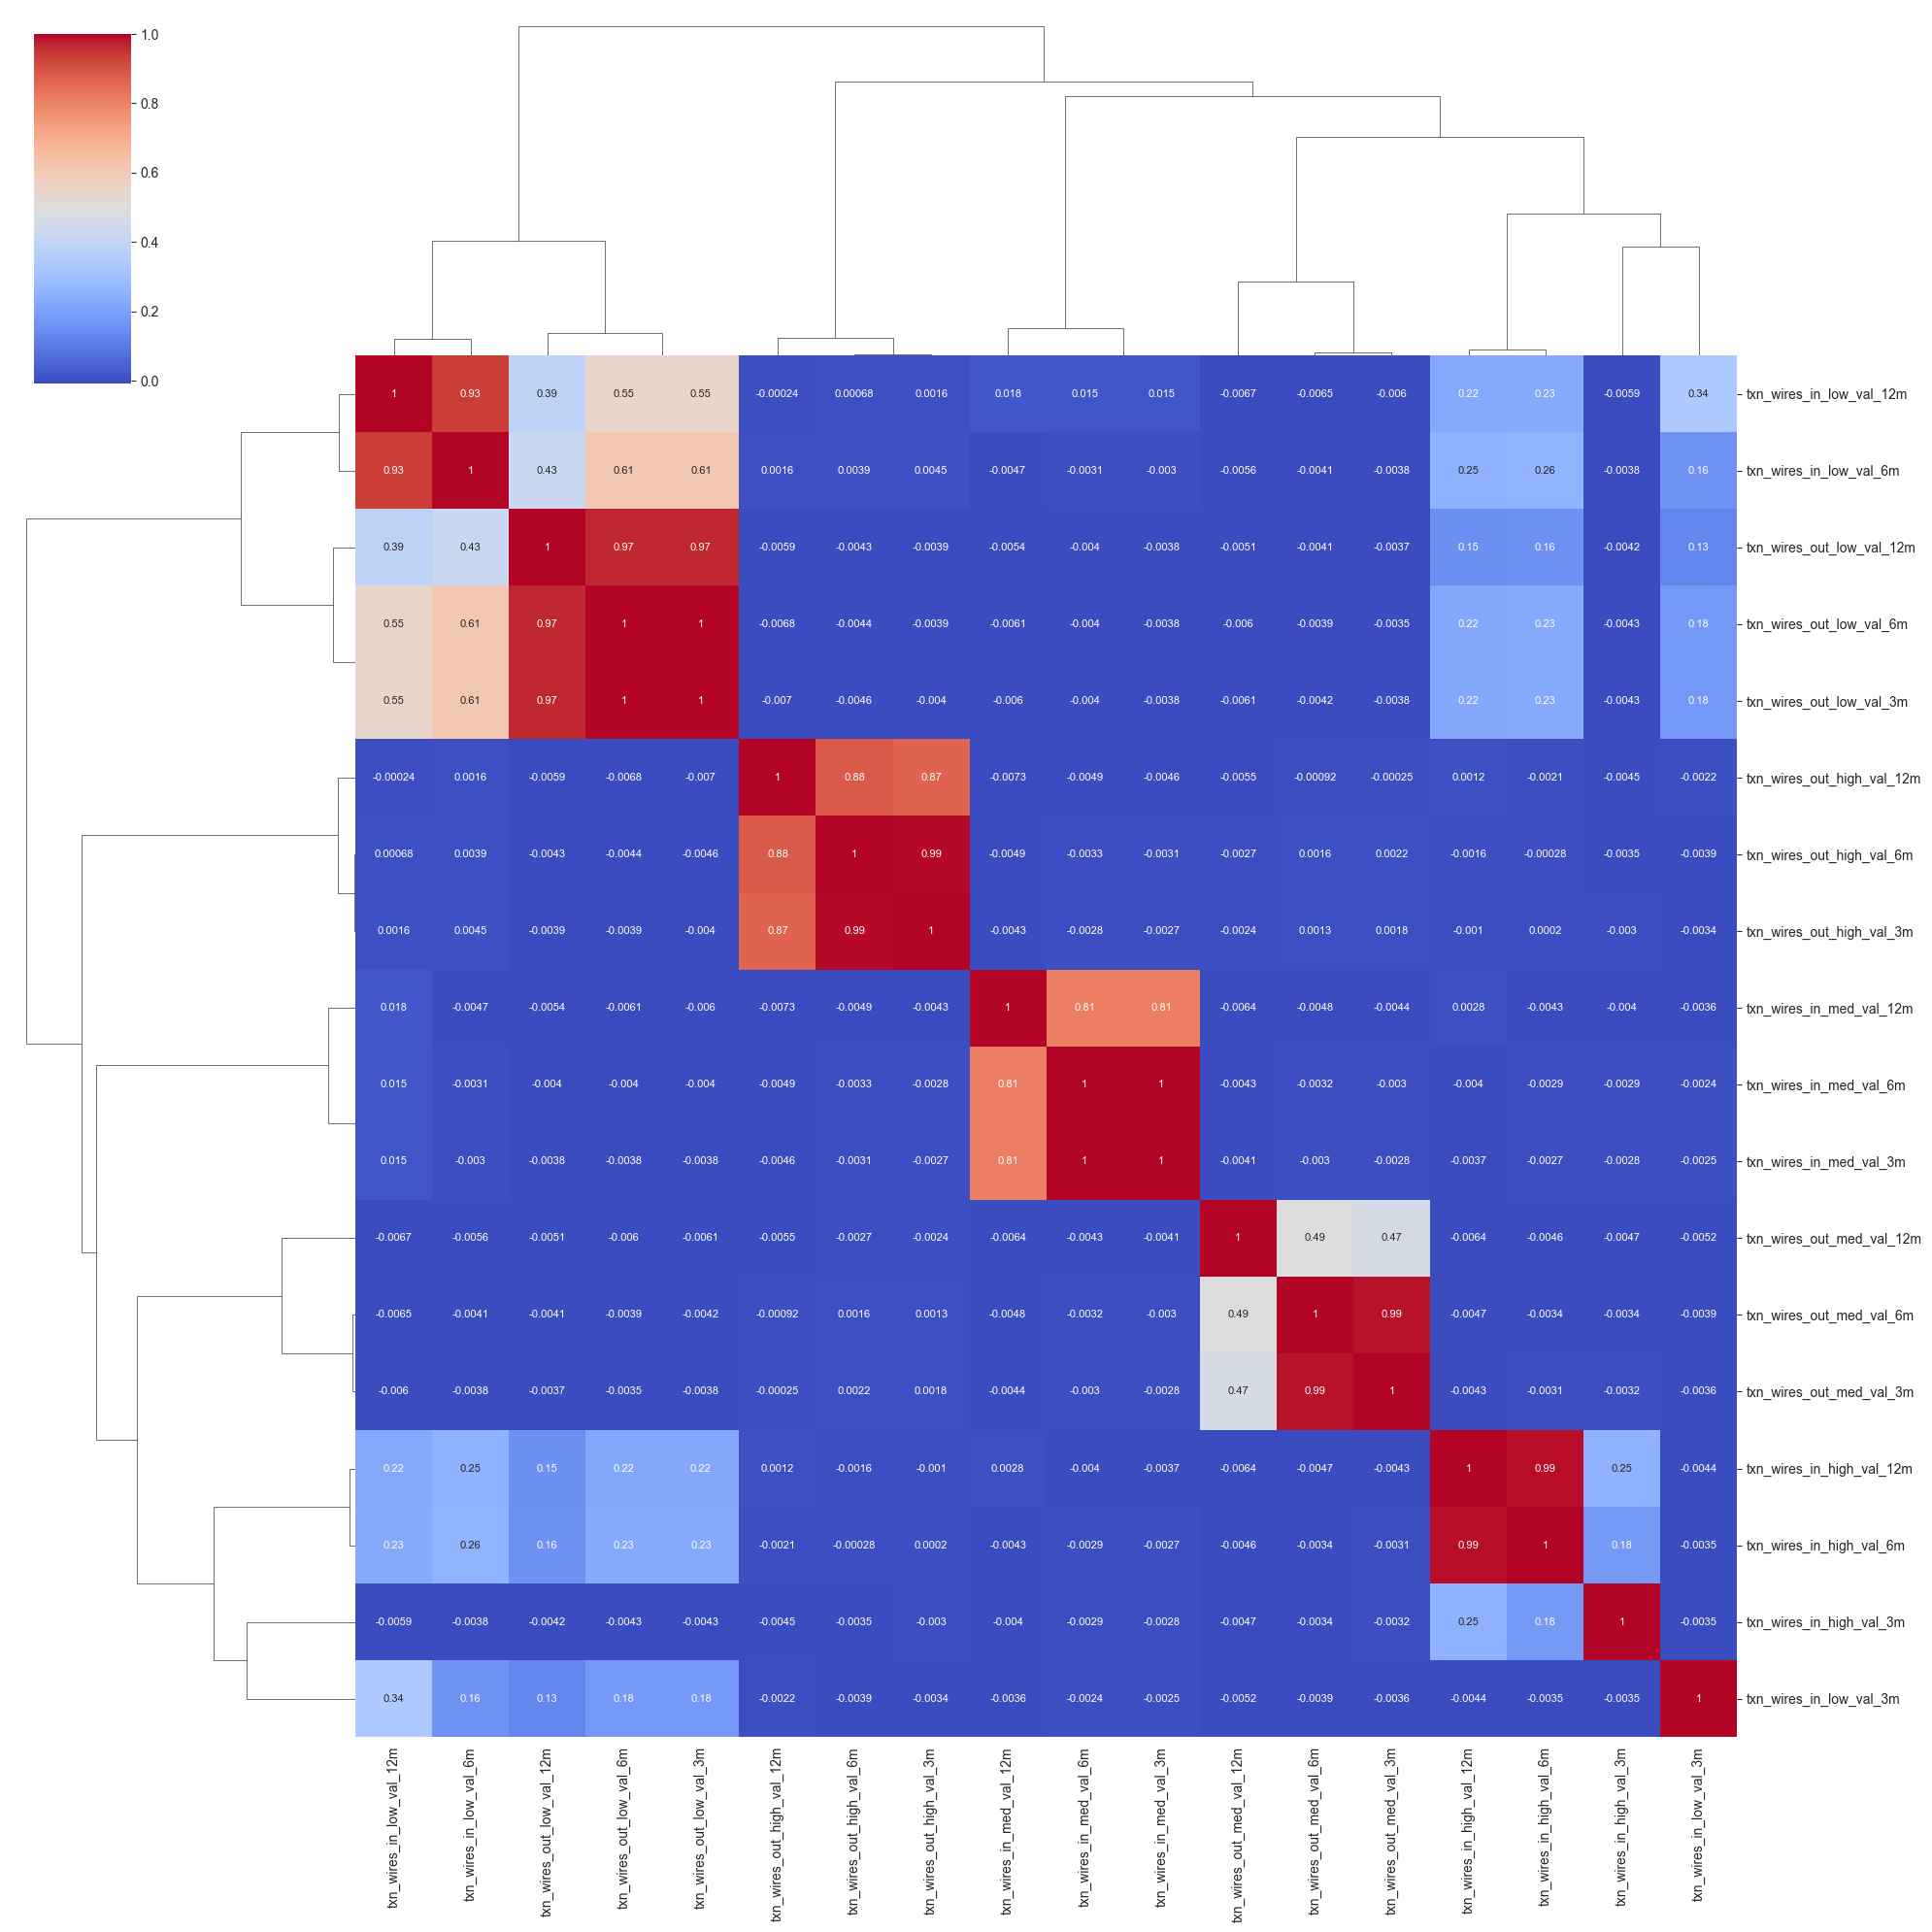

In [37]:
sns.clustermap(data.iloc[:, 50:-2].loc[:, hml_condition_with_val].corr(), method='ward', cmap='coolwarm',
               figsize=(20, 20), annot=True, annot_kws={'size': 8})

In [38]:
pd.DataFrame(
    mutual_info_classif(data.iloc[:, 50:-2].loc[:, hml_condition_with_val], data['rating'], discrete_features=True),
    index=data.iloc[:, 50:-2].loc[:, hml_condition_with_val].columns, columns=['info_gain'])

,info_gain
txn_wires_in_high_val_12m,0.077639
txn_wires_out_high_val_12m,0.035585
txn_wires_in_med_val_12m,0.023299
txn_wires_out_med_val_12m,0.013100
txn_wires_in_low_val_12m,0.052478
txn_wires_out_low_val_12m,0.038834
txn_wires_in_high_val_6m,0.040125
txn_wires_out_high_val_6m,0.023299
txn_wires_in_med_val_6m,0.011892
txn_wires_out_med_val_6m,0.007450


In [39]:
# we argue since we have the full value of wire in and out in 3m, 6m, 12m, we can add the med because of low information contribution and drop the low because it can be calcualted by total-high

In [40]:
ml_condition_with_val = data.iloc[:, 50:-2].columns.str.contains('low|high|med') & data.iloc[:,
                                                                                   50:-2].columns.str.contains('val')

In [41]:
data.iloc[:, 50:-2].loc[:, ml_condition_with_val].columns

Index(['txn_wires_in_high_val_12m', 'txn_wires_out_high_val_12m',
       'txn_wires_in_med_val_12m', 'txn_wires_out_med_val_12m',
       'txn_wires_in_low_val_12m', 'txn_wires_out_low_val_12m',
       'txn_wires_in_high_val_6m', 'txn_wires_out_high_val_6m',
       'txn_wires_in_med_val_6m', 'txn_wires_out_med_val_6m',
       'txn_wires_in_low_val_6m', 'txn_wires_out_low_val_6m',
       'txn_wires_in_high_val_3m', 'txn_wires_out_high_val_3m',
       'txn_wires_in_med_val_3m', 'txn_wires_out_med_val_3m',
       'txn_wires_in_low_val_3m', 'txn_wires_out_low_val_3m'],
      dtype='object')

In [42]:
possible_feature = pd.DataFrame()
possible_feature['wire_in_high+med_val_3m'] = data['txn_wires_in_high_val_3m'] + data['txn_wires_in_med_val_3m']
possible_feature['wire_in_high+med_val_6m'] = data['txn_wires_in_high_val_6m'] + data['txn_wires_in_med_val_6m']
possible_feature['wire_in_high+med_val_12m'] = data['txn_wires_in_high_val_12m'] + data['txn_wires_in_med_val_12m']
possible_feature['wire_out_high+med_val_3m'] = data['txn_wires_out_high_val_3m'] + data['txn_wires_out_med_val_3m']
possible_feature['wire_out_high+med_val_6m'] = data['txn_wires_out_high_val_6m'] + data['txn_wires_out_med_val_6m']
possible_feature['wire_out_high+med_val_12m'] = data['txn_wires_out_high_val_12m'] + data['txn_wires_out_med_val_12m']

In [43]:
pd.DataFrame(mutual_info_classif(possible_feature, data['rating'], discrete_features=True)).set_index(
    possible_feature.columns)

,0
wire_in_high+med_val_3m,0.031719
wire_in_high+med_val_6m,0.050588
wire_in_high+med_val_12m,0.094713
wire_out_high+med_val_3m,0.013100
wire_out_high+med_val_6m,0.029085
wire_out_high+med_val_12m,0.045360


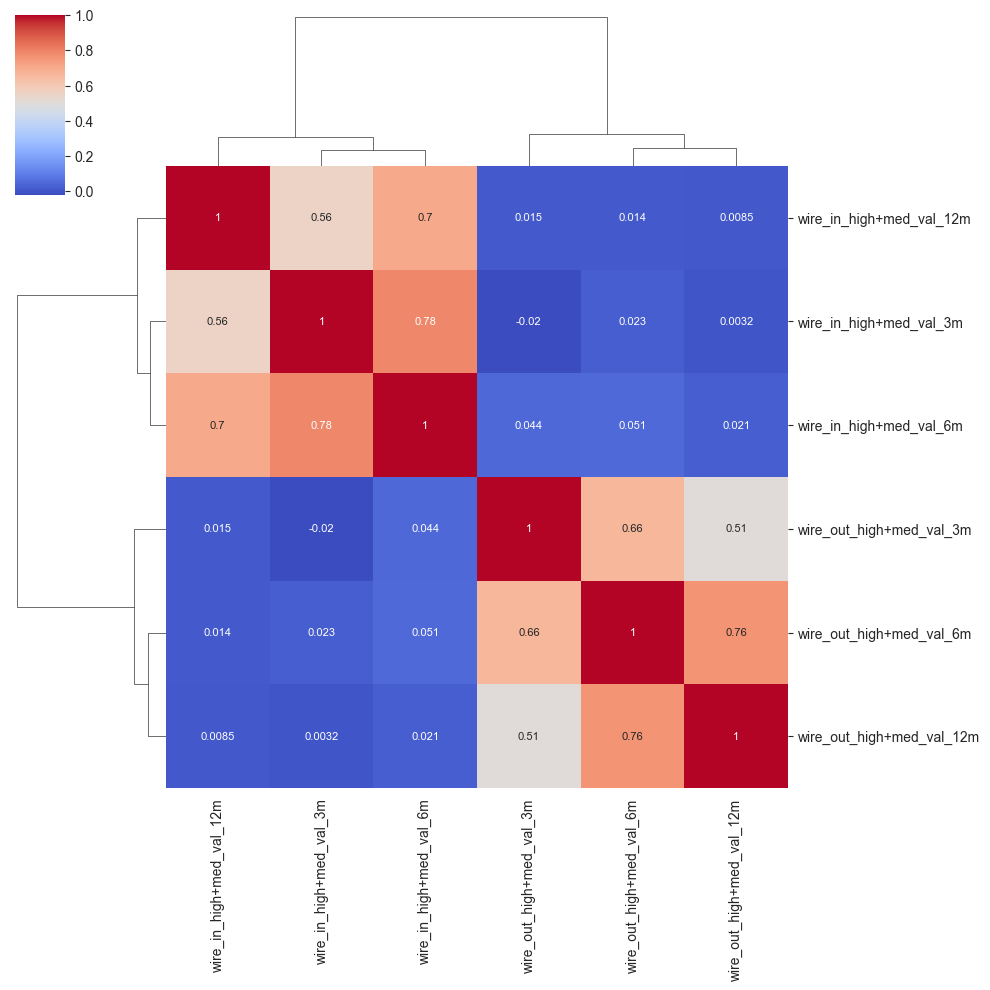

In [44]:
sns.clustermap(possible_feature.corr(method='kendall'), method='ward', cmap='coolwarm', figsize=(10, 10), annot=True,
               annot_kws={'size': 8})

In [45]:
# following the same logic, we can drop cnt high,med,low and only keep the high+med
ml_condition_with_cnt = data.iloc[:, 50:-2].columns.str.contains('low|high|med') & data.iloc[:,
                                                                                   50:-2].columns.str.contains('cnt')

In [46]:
data.iloc[:, 50:-2].loc[:, ml_condition_with_cnt].columns

Index(['txn_wires_in_high_cnt_12m', 'txn_wires_out_high_cnt_12m',
       'txn_wires_in_med_cnt_12m', 'txn_wires_out_med_cnt_12m',
       'txn_wires_in_low_cnt_12m', 'txn_wires_out_low_cnt_12m',
       'txn_wires_in_high_cnt_6m', 'txn_wires_out_high_cnt_6m',
       'txn_wires_in_med_cnt_6m', 'txn_wires_out_med_cnt_6m',
       'txn_wires_in_low_cnt_6m', 'txn_wires_out_low_cnt_6m',
       'txn_wires_in_high_cnt_3m', 'txn_wires_out_high_cnt_3m',
       'txn_wires_in_med_cnt_3m', 'txn_wires_out_med_cnt_3m',
       'txn_wires_in_low_cnt_3m', 'txn_wires_out_low_cnt_3m'],
      dtype='object')

## cross border

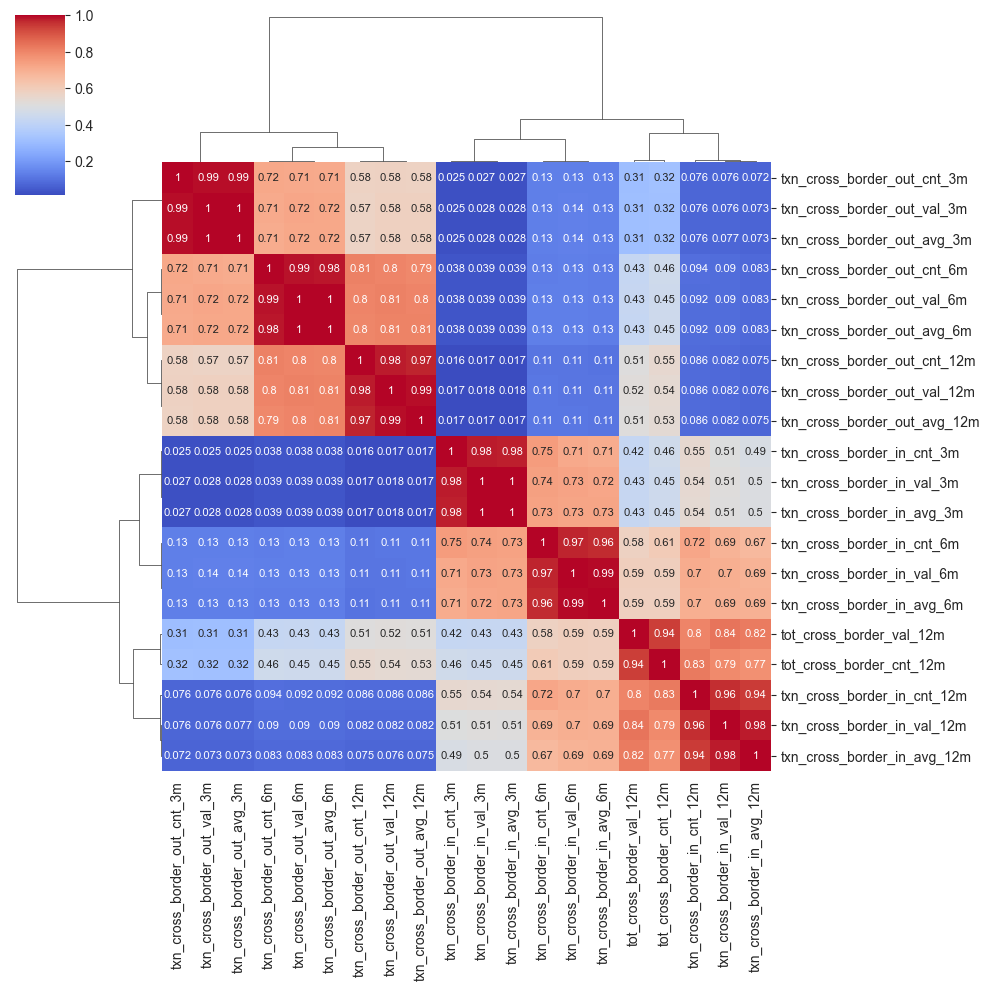

In [47]:
condition = data.columns.str.contains('cross') & data.columns.str.contains('cnt|avg|val')
sns.clustermap(data.loc[:, condition].corr(method='kendall'), method='ward', cmap='coolwarm', figsize=(10, 10),
               annot=True,
               annot_kws={'size': 8})

In [48]:
pd.DataFrame(mutual_info_classif(data.loc[:, condition], data['rating'], discrete_features=True)).set_index(
    data.loc[:, condition].columns)  # we only need val 

,0
txn_cross_border_in_val_12m,0.125913
txn_cross_border_out_val_12m,0.059809
txn_cross_border_in_cnt_12m,0.050654
txn_cross_border_out_cnt_12m,0.030121
txn_cross_border_in_avg_12m,0.125913
txn_cross_border_out_avg_12m,0.059809
txn_cross_border_in_val_6m,0.068324
txn_cross_border_out_val_6m,0.042749
txn_cross_border_in_cnt_6m,0.027181
txn_cross_border_out_cnt_6m,0.025610


In [49]:
condition = data.columns.str.contains('cross') & data.columns.str.contains('cnt|avg')
data.loc[:, condition].columns

Index(['txn_cross_border_in_cnt_12m', 'txn_cross_border_out_cnt_12m',
       'txn_cross_border_in_avg_12m', 'txn_cross_border_out_avg_12m',
       'txn_cross_border_in_cnt_6m', 'txn_cross_border_out_cnt_6m',
       'txn_cross_border_in_avg_6m', 'txn_cross_border_out_avg_6m',
       'txn_cross_border_in_cnt_3m', 'txn_cross_border_out_cnt_3m',
       'txn_cross_border_in_avg_3m', 'txn_cross_border_out_avg_3m',
       'tot_cross_border_cnt_12m'],
      dtype='object')

complete account

In [50]:
temp = data.loc[:, ['prod_sav', 'prod_cda', 'prod_crc']]
temp['complete_account'] = data['prod_sav'] * data['prod_cda'] * data['prod_crc']
mutual_info_classif(temp, data['rating'], discrete_features=True)

array([0.00914176, 0.04529319, 0.00129574, 0.06361827])

In [51]:
temp.corr()

,prod_sav,prod_cda,prod_crc,complete_account
prod_sav,1.000000,0.401802,0.048833,0.156999
prod_cda,0.401802,1.000000,0.122171,0.020838
prod_crc,0.048833,0.122171,1.000000,0.370716
complete_account,0.156999,0.020838,0.370716,1.000000


asset liability imbalance

In [52]:
temp = data.loc[:, ['prod_asset_balance', 'prod_liability_balance']]
temp['asset_liability_imbalance'] = (data['prod_asset_balance'] - data['prod_liability_balance']) / (
        data['prod_asset_balance'] + data['prod_liability_balance'])
mutual_info_classif(temp, data['rating'], discrete_features=True)

array([0.41301762, 0.36347236, 0.53165716])

In [53]:
temp.corr()

,prod_asset_balance,prod_liability_balance,asset_liability_imbalance
prod_asset_balance,1.000000,0.008997,0.041988
prod_liability_balance,0.008997,1.000000,-0.041988
asset_liability_imbalance,0.041988,-0.041988,1.000000


primary account imbalance

In [54]:
temp = data.loc[:, ['prod_prim_acct_cnt', 'prod_none_prim_acct_cnt']]
temp['primary_account_imbalance'] = (data['prod_prim_acct_cnt'] - data['prod_none_prim_acct_cnt']) / (
        data['prod_prim_acct_cnt'] + data['prod_none_prim_acct_cnt'])
mutual_info_classif(temp, data['rating'], discrete_features=True)

array([0.03892661, 0.01163802, 0.10149633])

In [55]:
temp.corr()

,prod_prim_acct_cnt,prod_none_prim_acct_cnt,primary_account_imbalance
prod_prim_acct_cnt,1.000000,0.036419,-0.08693
prod_none_prim_acct_cnt,0.036419,1.000000,0.08693
primary_account_imbalance,-0.086930,0.086930,1.00000


canceled account

In [56]:
temp = data.loc[:, ['prod_total_acct_cnt', 'prod_none_prim_acct_cnt', 'prod_prim_acct_cnt']]
temp['canceled_account'] = 1 - (data['prod_none_prim_acct_cnt'] + data['prod_prim_acct_cnt']) / data[
    'prod_total_acct_cnt']
mutual_info_classif(temp, data['rating'], discrete_features=True)

array([0.04715578, 0.01163802, 0.03892661, 0.10149633])

In [57]:
temp.corr()

,prod_total_acct_cnt,prod_none_prim_acct_cnt,prod_prim_acct_cnt,canceled_account
prod_total_acct_cnt,1.000000e+00,0.483300,0.892475,1.392056e-18
prod_none_prim_acct_cnt,4.833000e-01,1.000000,0.036419,9.635692e-03
prod_prim_acct_cnt,8.924755e-01,0.036419,1.000000,-4.964986e-03
canceled_account,1.392056e-18,0.009636,-0.004965,1.000000e+00


In [58]:
# plot horizontal bar chart of mutual information
info_gain = pd.DataFrame(
    mutual_info_classif(data.drop(columns=['rating', 'cust_id_masked']), data['rating'], discrete_features=True),
    index=data.drop(columns=['rating', 'cust_id_masked']).columns, columns=['info_gain']).sort_values(by='info_gain',
                                                                                                      ascending=False)

In [59]:
mutual_info_classif(data.loc[:, ['prod_sav', 'prod_cda', 'prod_crc']], data['rating'], discrete_features=True)

array([0.00914176, 0.04529319, 0.00129574])

net cash trend

In [60]:
temp = data.loc[:, ['txn_large_in_cash_val_10k_5m', 'txn_large_in_cash_val_10k_3m', 'txn_large_out_cash_val_10k_5m',
                    'txn_large_out_cash_val_10k_3m']]
temp['net_cash_trend'] = (data['txn_large_out_cash_val_10k_5m'] - data['txn_large_out_cash_val_10k_3m']) / 2 - (
        data['txn_large_in_cash_val_10k_5m'] - data['txn_large_in_cash_val_10k_3m']) / 2
mutual_info_classif(temp, data['rating'], discrete_features=True)

array([0.05220102, 0.03971977, 0.02238072, 0.01602982, 0.07079763])

In [61]:
temp.corr()

,txn_large_in_cash_val_10k_5m,txn_large_in_cash_val_10k_3m,txn_large_out_cash_val_10k_5m,txn_large_out_cash_val_10k_3m,net_cash_trend
txn_large_in_cash_val_10k_5m,1.000000,0.932393,0.547164,0.542500,-0.141450
txn_large_in_cash_val_10k_3m,0.932393,1.000000,0.583763,0.575653,0.170154
txn_large_out_cash_val_10k_5m,0.547164,0.583763,1.000000,0.972047,0.145067
txn_large_out_cash_val_10k_3m,0.542500,0.575653,0.972047,1.000000,0.011686
net_cash_trend,-0.141450,0.170154,0.145067,0.011686,1.000000


In [62]:
info_gain.describe()

,info_gain
count,150.000000
mean,0.064345
std,0.107214
min,0.000083
25%,0.011560
50%,0.025299
75%,0.050603
max,0.565524


In [63]:
info_gain.loc['cust_cdn_resident']

info_gain    0.020894
Name: cust_cdn_resident, dtype: float64

# Feature Engineering 

In [5]:

possible_feature = pd.DataFrame()
# idea based feature engineering
possible_feature['complete_account'] = data['prod_sav'] * data['prod_cda'] * data['prod_crc']
possible_feature['asset_liability_imbalance'] = (data['prod_asset_balance'] - data['prod_liability_balance']) / (
        data['prod_asset_balance'] + data['prod_liability_balance'])
possible_feature['primary_account_imbalance'] = (data['prod_prim_acct_cnt'] - data['prod_none_prim_acct_cnt']) / (
        data['prod_prim_acct_cnt'] + data['prod_none_prim_acct_cnt'])
possible_feature['canceled_account'] = 1 - (data['prod_none_prim_acct_cnt'] + data['prod_prim_acct_cnt']) / data[
    'prod_total_acct_cnt']
# reduce dimension of cash related features
possible_feature['cash_out_trend'] = ((data['txn_cash_out_avg_5m'] - data['txn_cash_out_avg_3m']) / 2 + (
        data['txn_cash_out_val_5m'] - data['txn_cash_out_val_3m']) / 2) / 2
possible_feature['large_cash_out_avoid_mark_trend'] = ((data['txn_large_out_cash_val_10k_5m'] - data[
    'txn_large_out_cash_val_9k_5m']) / 2 + (data['txn_large_out_cash_val_10k_3m'] - data[
    'txn_large_out_cash_val_9k_3m']) / 2) / 2
possible_feature['large_cash_in_avoid_mark_trend'] = ((data['txn_large_in_cash_val_10k_5m'] - data[
    'txn_large_in_cash_val_9k_5m']) / 2 + (data['txn_large_in_cash_val_10k_3m'] - data[
    'txn_large_in_cash_val_9k_3m']) / 2) / 2
possible_feature['cash_in_cnt_trend'] = (data['txn_cash_in_cnt_5m'] - data['txn_cash_in_cnt_3m']) / 2
possible_feature['cash_out_cnt_trend'] = (data['txn_cash_out_cnt_5m'] - data['txn_cash_out_cnt_3m']) / 2
possible_feature['cash_in_avg_trend'] = (data['txn_cash_in_avg_5m'] - data['txn_cash_in_avg_3m']) / 2
possible_feature['cash_in_val_trend'] = (data['txn_cash_in_val_5m'] - data['txn_cash_in_val_3m']) / 2

possible_feature['wire_in_high+med_val_3m'] = data['txn_wires_in_high_val_3m'] + data['txn_wires_in_med_val_3m']
possible_feature['wire_in_high+med_val_6m'] = data['txn_wires_in_high_val_6m'] + data['txn_wires_in_med_val_6m']
possible_feature['wire_in_high+med_val_12m'] = data['txn_wires_in_high_val_12m'] + data['txn_wires_in_med_val_12m']

possible_feature['wire_out_high+med_val_3m'] = data['txn_wires_out_high_val_3m'] + data['txn_wires_out_med_val_3m']
possible_feature['wire_out_high+med_val_6m'] = data['txn_wires_out_high_val_6m'] + data['txn_wires_out_med_val_6m']
possible_feature['wire_out_high+med_val_12m'] = data['txn_wires_out_high_val_12m'] + data['txn_wires_out_med_val_12m']

# possible_feature['wire_in_high+med_cnt_3m'] = data['txn_wires_in_high_cnt_3m'] + data['txn_wires_in_med_cnt_3m']
# possible_feature['wire_in_high+med_cnt_6m'] = data['txn_wires_in_high_cnt_6m'] + data['txn_wires_in_med_cnt_6m']
# possible_feature['wire_in_high+med_cnt_12m'] = data['txn_wires_in_high_cnt_12m'] + data['txn_wires_in_med_cnt_12m']

# possible_feature['wire_out_high+med_cnt_3m'] = data['txn_wires_out_high_cnt_3m'] + data['txn_wires_out_med_cnt_3m']
# possible_feature['wire_out_high+med_cnt_6m'] = data['txn_wires_out_high_cnt_6m'] + data['txn_wires_out_med_cnt_6m']
# possible_feature['wire_out_high+med_cnt_12m'] = data['txn_wires_out_high_cnt_12m'] + data['txn_wires_out_med_cnt_12m']

In [6]:
# data = data.drop(
#     columns=[
#                 'geo_mail_addr_country_rate_med',
#                 'geo_domicile_country_rate_med',
#                 'geo_domicile_country_rate_high',
#                 'geo_domicile_country_rate_low',
#                 'geo_mail_addr_country_rate_low',
#                 'cust_id_masked',
#                 'txn_cash_out_avg_3m',
#                 'txn_cash_out_val_3m',
#                 'txn_large_out_cash_val_10k_3m',
#                 'txn_large_out_cash_val_9k_3m',
#                 'txn_cash_in_cnt_3m',
#                 'txn_cash_out_cnt_3m',
#                 'txn_cash_in_avg_3m',
#                 "txn_cash_in_val_3m",
#                 'txn_large_in_cash_val_10k_3m',
#                 'txn_large_in_cash_val_9k_3m',
#             ]  # cash related
#             + [
#                 'txn_wires_in_high_avg_12m', 'txn_wires_out_high_avg_12m',
#                 'txn_wires_in_med_avg_12m', 'txn_wires_out_med_avg_12m',
#                 'txn_wires_in_low_avg_12m', 'txn_wires_out_low_avg_12m',
#                 'txn_wires_in_high_avg_6m', 'txn_wires_out_high_avg_6m',
#                 'txn_wires_in_med_avg_6m', 'txn_wires_out_med_avg_6m',
#                 'txn_wires_in_low_avg_6m', 'txn_wires_out_low_avg_6m',
#                 'txn_wires_in_high_avg_3m', 'txn_wires_out_high_avg_3m',
#                 'txn_wires_in_med_avg_3m', 'txn_wires_out_med_avg_3m',
#                 'txn_wires_in_low_avg_3m', 'txn_wires_out_low_avg_3m']  # wires average
#             + [
# 
#                 'txn_wires_in_high_val_12m', 'txn_wires_out_high_val_12m',
#                 'txn_wires_in_med_val_12m', 'txn_wires_out_med_val_12m',
#                 'txn_wires_in_low_val_12m', 'txn_wires_out_low_val_12m',
#                 'txn_wires_in_high_val_6m', 'txn_wires_out_high_val_6m',
#                 'txn_wires_in_med_val_6m', 'txn_wires_out_med_val_6m',
#                 'txn_wires_in_low_val_6m', 'txn_wires_out_low_val_6m',
#                 'txn_wires_in_high_val_3m', 'txn_wires_out_high_val_3m',
#                 'txn_wires_in_med_val_3m', 'txn_wires_out_med_val_3m',
#                 'txn_wires_in_low_val_3m', 'txn_wires_out_low_val_3m']  # wires value med,low,high
#             + [
#                 'txn_wires_in_high_cnt_12m', 'txn_wires_out_high_cnt_12m',
#                 'txn_wires_in_med_cnt_12m', 'txn_wires_out_med_cnt_12m',
#                 'txn_wires_in_low_cnt_12m', 'txn_wires_out_low_cnt_12m',
#                 'txn_wires_in_high_cnt_6m', 'txn_wires_out_high_cnt_6m',
#                 'txn_wires_in_med_cnt_6m', 'txn_wires_out_med_cnt_6m',
#                 'txn_wires_in_low_cnt_6m', 'txn_wires_out_low_cnt_6m',
#                 'txn_wires_in_high_cnt_3m', 'txn_wires_out_high_cnt_3m',
#                 'txn_wires_in_med_cnt_3m', 'txn_wires_out_med_cnt_3m',
#                 'txn_wires_in_low_cnt_3m', 'txn_wires_out_low_cnt_3m']  # wires cnt med,low,high
#             + [
#                 'txn_cross_border_in_cnt_12m', 'txn_cross_border_out_cnt_12m',
#                 'txn_cross_border_in_avg_12m', 'txn_cross_border_out_avg_12m',
#                 'txn_cross_border_in_cnt_6m', 'txn_cross_border_out_cnt_6m',
#                 'txn_cross_border_in_avg_6m', 'txn_cross_border_out_avg_6m',
#                 'txn_cross_border_in_cnt_3m', 'txn_cross_border_out_cnt_3m',
#                 'txn_cross_border_in_avg_3m', 'txn_cross_border_out_avg_3m',
#                 'tot_cross_border_cnt_12m']  # cross border not val
# )

In [7]:
data = data.drop(columns=['cust_id_masked'])

In [8]:
pd.DataFrame(mutual_info_classif(possible_feature, data['rating'], discrete_features=True)).set_index(
    possible_feature.columns)

,0
complete_account,0.063618
asset_liability_imbalance,0.531657
primary_account_imbalance,0.101496
canceled_account,0.101496
cash_out_trend,0.352348
large_cash_out_avoid_mark_trend,0.030010
large_cash_in_avoid_mark_trend,0.059455
cash_in_cnt_trend,0.055381
cash_out_cnt_trend,0.079443
cash_in_avg_trend,0.327123


In [9]:
# merge possible feature with original data
data = pd.concat([data, possible_feature], axis=1)

# Data Preprocessing

In [10]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['rating']), data['rating'],
                                                    test_size=0.2, stratify=data['rating'], random_state=42)

In [11]:
# check if the split is stratified
y_train.value_counts().apply(lambda x: x / y_train.shape[0])

0    0.66383
1    0.33617
Name: rating, dtype: float64

In [12]:
y_test.value_counts().apply(lambda x: x / y_test.shape[0])

0    0.661017
1    0.338983
Name: rating, dtype: float64

In [13]:
# run lightgbm feature importance on original data
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


In [14]:
# specify your configurations as a dict
params = {
    "class_weight": 'balanced'
}
# train lightgbm
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,

                )

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2927
[LightGBM] [Info] Number of data points in the train set: 470, number of used features: 104
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Start training from score 0.336170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

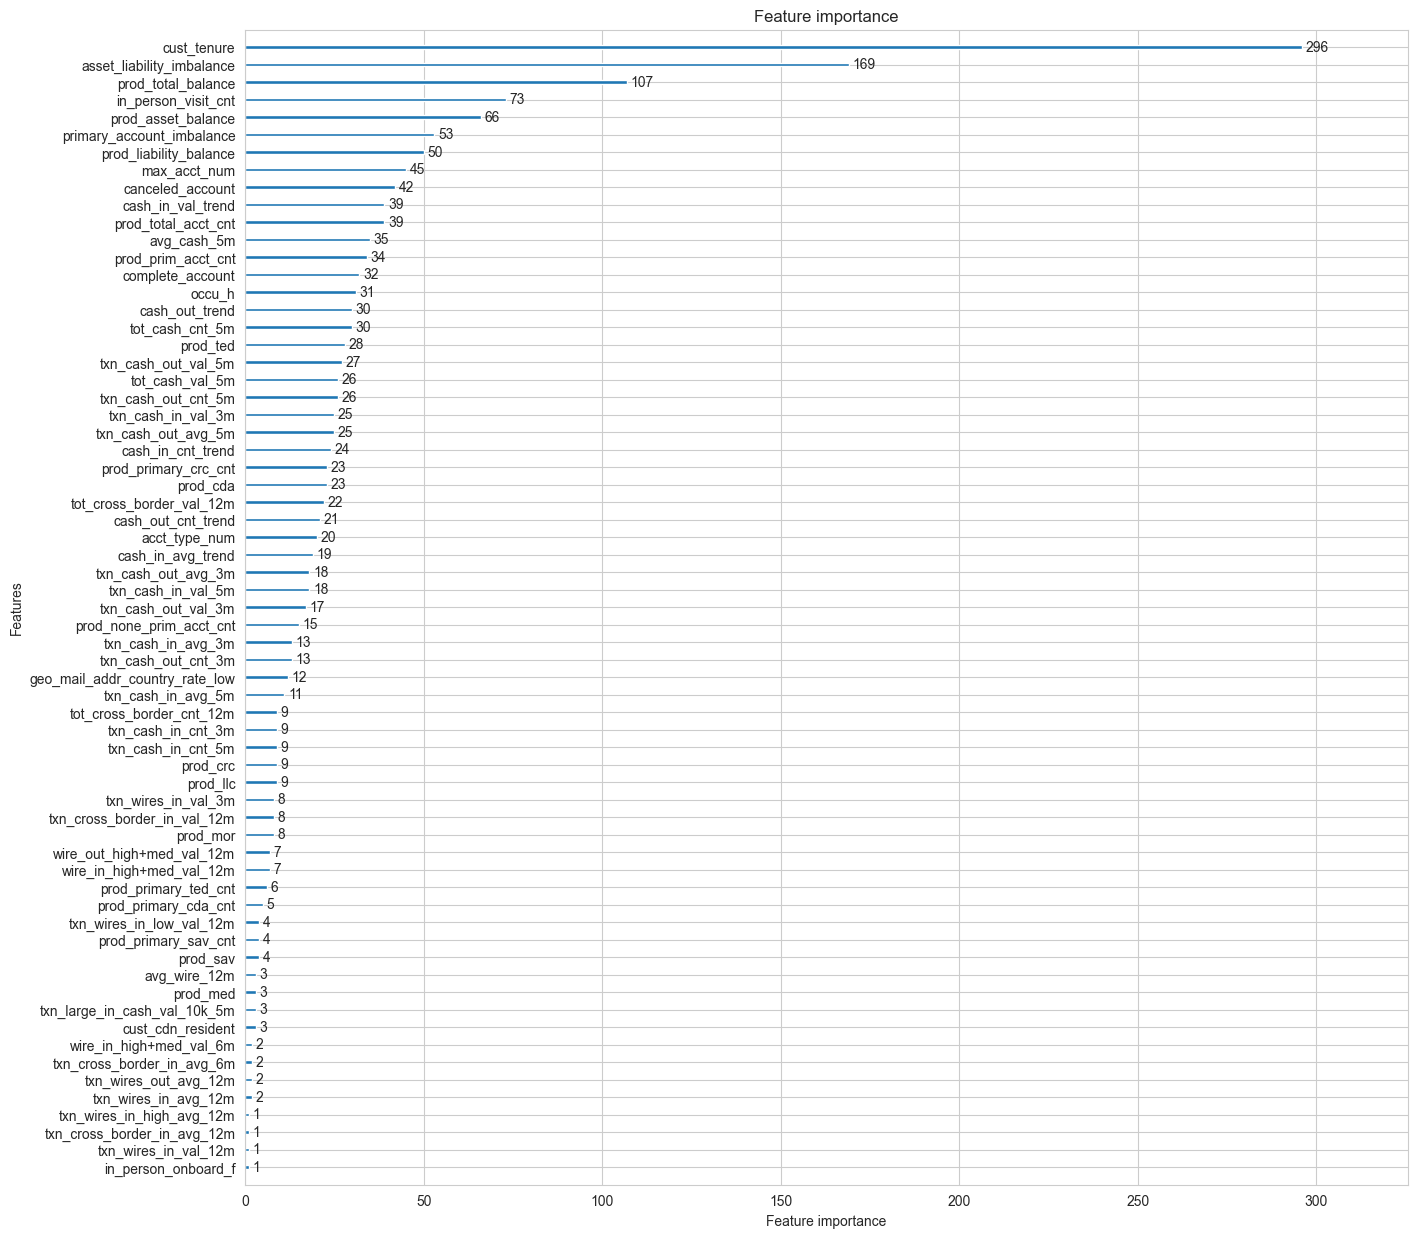

In [15]:
#plot feature importance
import matplotlib.pyplot as plt

lgb.plot_importance(gbm, figsize=(15, 15))
plt.show()

In [16]:
# see AUC in test set
from sklearn.metrics import roc_auc_score

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
print('The AUC of prediction is:', roc_auc_score(y_test, y_pred))

The AUC of prediction is: 0.8251602564102565


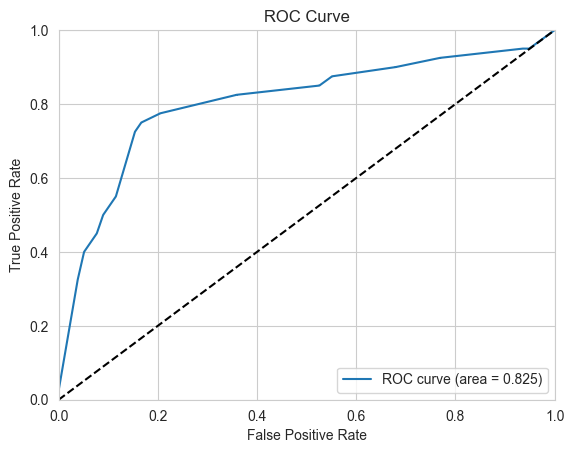

In [18]:
#plot auc plot with 45 degree line
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# apply exponential smoothing to tpr
from statsmodels.tsa.holtwinters import ExponentialSmoothing

tpr = ExponentialSmoothing(tpr).fit().fittedvalues
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# rerun with feature contribution >0.05%

In [19]:
# get the most important features
important_features = pd.DataFrame(gbm.feature_importance(), index=X_train.columns, columns=['importance']).sort_values(
    by='importance', ascending=False)
important_features['importance'] = important_features['importance'] / important_features['importance'].sum()
important_features = important_features[important_features['importance'] >= 0.001].index.tolist()

In [20]:
important_features

['cust_tenure',
 'asset_liability_imbalance',
 'prod_total_balance',
 'in_person_visit_cnt',
 'prod_asset_balance',
 'primary_account_imbalance',
 'prod_liability_balance',
 'max_acct_num',
 'canceled_account',
 'cash_in_val_trend',
 'prod_total_acct_cnt',
 'avg_cash_5m',
 'prod_prim_acct_cnt',
 'complete_account',
 'occu_h',
 'tot_cash_cnt_5m',
 'cash_out_trend',
 'prod_ted',
 'txn_cash_out_val_5m',
 'txn_cash_out_cnt_5m',
 'tot_cash_val_5m',
 'txn_cash_in_val_3m',
 'txn_cash_out_avg_5m',
 'cash_in_cnt_trend',
 'prod_cda',
 'prod_primary_crc_cnt',
 'tot_cross_border_val_12m',
 'cash_out_cnt_trend',
 'acct_type_num',
 'cash_in_avg_trend',
 'txn_cash_out_avg_3m',
 'txn_cash_in_val_5m',
 'txn_cash_out_val_3m',
 'prod_none_prim_acct_cnt',
 'txn_cash_out_cnt_3m',
 'txn_cash_in_avg_3m',
 'geo_mail_addr_country_rate_low',
 'txn_cash_in_avg_5m',
 'txn_cash_in_cnt_5m',
 'tot_cross_border_cnt_12m',
 'txn_cash_in_cnt_3m',
 'prod_crc',
 'prod_llc',
 'txn_cross_border_in_val_12m',
 'prod_mor',
 't

In [21]:
# train lightgbm with important features
lgb_train = lgb.Dataset(X_train[important_features], y_train)
lgb_eval = lgb.Dataset(X_test[important_features], y_test, reference=lgb_train)


In [22]:
# specify your configurations as a dict
params = {
    'verbosity': -1,
    'class_weight': 'balanced'
}
# train lightgbm
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                )

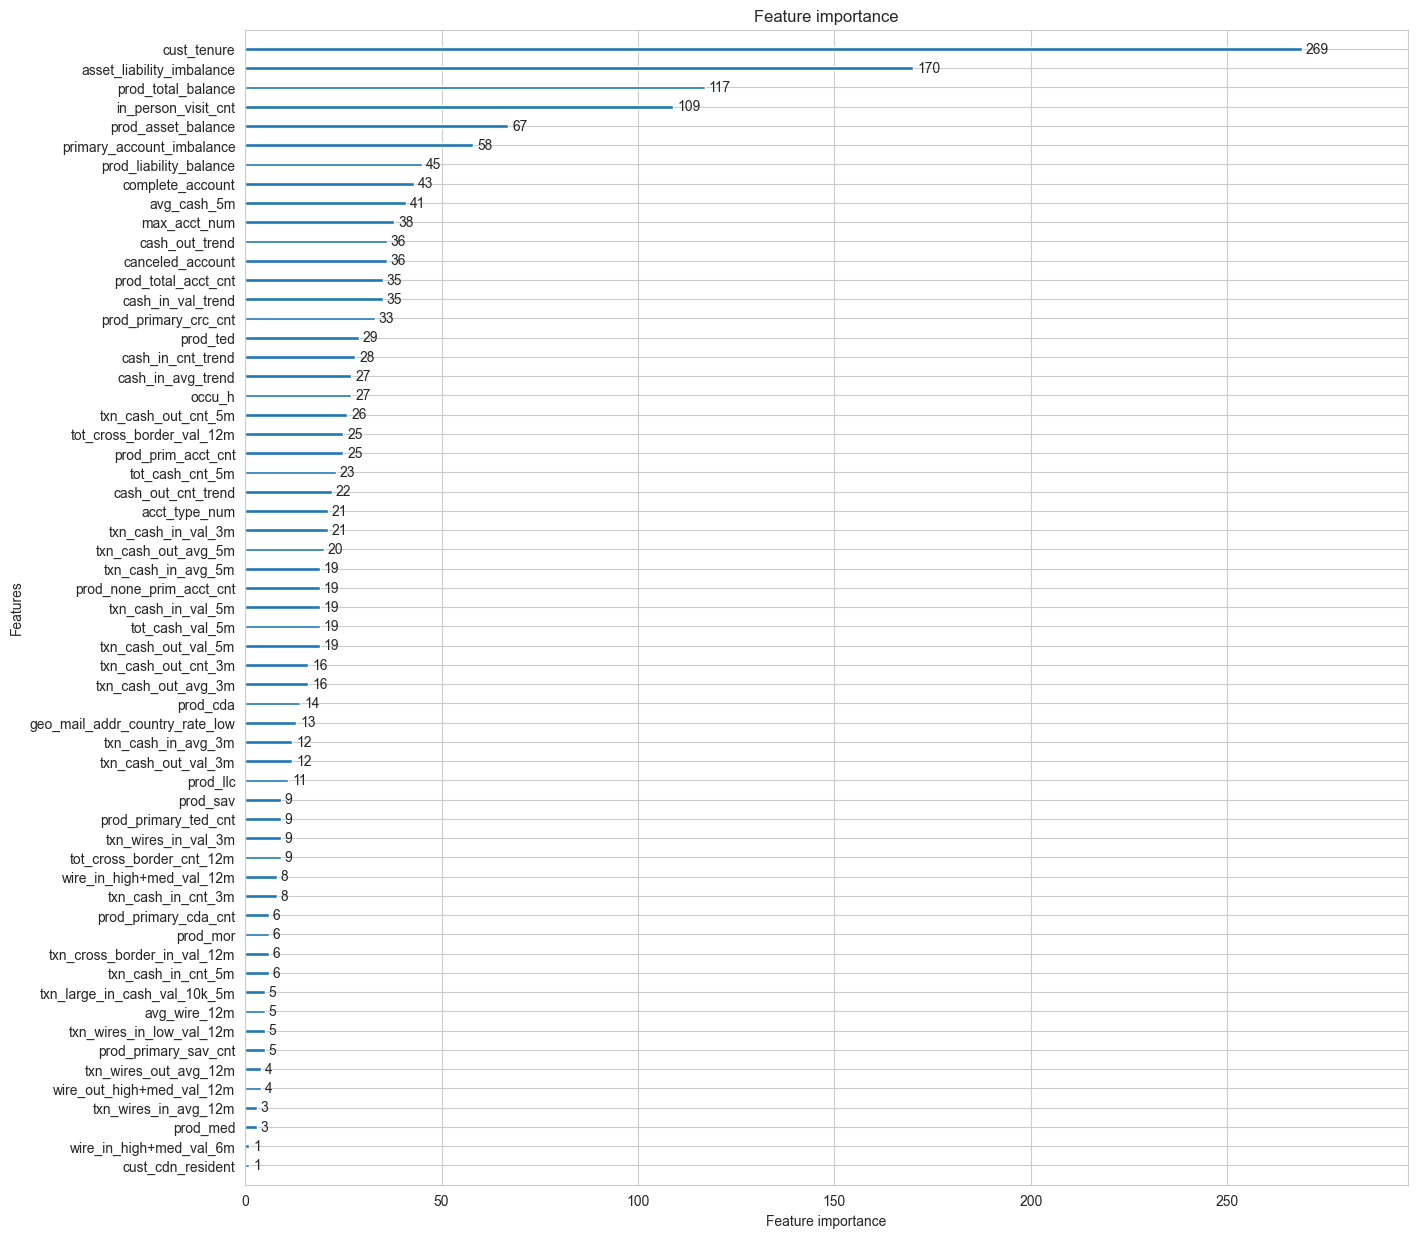

In [23]:
# plot feature importance

lgb.plot_importance(gbm, figsize=(15, 15))
plt.show()

In [24]:
# see AUC in test set
from sklearn.metrics import roc_auc_score

y_pred = gbm.predict(X_test[important_features], num_iteration=gbm.best_iteration)
print('The AUC of prediction is:', roc_auc_score(y_test, y_pred))

The AUC of prediction is: 0.8318910256410257


In [25]:
pd.DataFrame(y_pred).value_counts()

-0.056175    2
-0.357424    1
 0.458188    1
 0.549689    1
 0.543623    1
            ..
 0.135820    1
 0.134157    1
 0.129073    1
 0.128703    1
 1.064369    1
Length: 117, dtype: int64

# Q4: model tuning

In [26]:
best_data = data[important_features + ['rating']]

In [27]:
# hyperparameter tuning using optuna
import optuna
from sklearn.metrics import roc_auc_score


def objective(trial):
    # split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(best_data.drop(columns=['rating']), best_data['rating'],
                                                        test_size=0.2, stratify=best_data['rating'], random_state=42)
    # create dataset for lightgbm
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    # specify your configurations as a dict
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        'num_iterations': trial.suggest_int('num_iterations', 100, 1000),
        'early_stopping_round': trial.suggest_int('early_stopping_round', 1, 30),
        'class_weight': 'balanced'
    }
    # train lightgbm
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=100,
                    valid_sets=lgb_eval,
                    )
    # see AUC in test set
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    return roc_auc_score(y_test, y_pred)

In [28]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-11-22 18:13:23,240] A new study created in memory with name: no-name-17f95d71-c15d-47a7-8d0c-80869e3e7108
[I 2023-11-22 18:13:23,265] Trial 0 finished with value: 0.6685897435897437 and parameters: {'lambda_l1': 0.01363383511082741, 'lambda_l2': 0.2815072541885778, 'num_leaves': 156, 'feature_fraction': 0.5702178595618143, 'bagging_fraction': 0.5938629667689281, 'bagging_freq': 4, 'min_child_samples': 96, 'learning_rate': 0.0024637103000610555, 'num_iterations': 595, 'early_stopping_round': 6}. Best is trial 0 with value: 0.6685897435897437.
[I 2023-11-22 18:13:23,292] Trial 1 finished with value: 0.7931089743589743 and parameters: {'lambda_l1': 0.30095055043003094, 'lambda_l2': 0.04264214383568243, 'num_leaves': 86, 'feature_fraction': 0.6775851564106994, 'bagging_fraction': 0.44544734488487714, 'bagging_freq': 2, 'min_child_samples': 54, 'learning_rate': 0.14321612439383313, 'num_iterations': 481, 'early_stopping_round': 8}. Best is trial 1 with value: 0.7931089743589743.
[I 

In [29]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best auc:', study.best_value)

Number of finished trials: 100
Best trial: {'lambda_l1': 1.535807770001517e-08, 'lambda_l2': 0.013666440353567934, 'num_leaves': 27, 'feature_fraction': 0.6867981681092874, 'bagging_fraction': 0.6276545051944322, 'bagging_freq': 1, 'min_child_samples': 8, 'learning_rate': 0.07037818925958642, 'num_iterations': 172, 'early_stopping_round': 8}
Best auc: 0.8979166666666667


In [30]:
# get the best model prediction

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(best_data.drop(columns=['rating']), best_data['rating'],
                                                    test_size=0.2, stratify=best_data['rating'], random_state=42)
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
# specify your configurations as a dict

params = {
    'objective': 'binary',
    'metric': 'auc',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'lambda_l1': study.best_trial.params['lambda_l1'],
    'lambda_l2': study.best_trial.params['lambda_l2'],
    'num_leaves': study.best_trial.params['num_leaves'],
    'feature_fraction': study.best_trial.params['feature_fraction'],
    'bagging_fraction': study.best_trial.params['bagging_fraction'],
    'bagging_freq': study.best_trial.params['bagging_freq'],
    'min_child_samples': study.best_trial.params['min_child_samples'],
    'learning_rate': study.best_trial.params['learning_rate'],
    'num_iterations': study.best_trial.params['num_iterations'],
    'early_stopping_round': study.best_trial.params['early_stopping_round'],
    'class_weight': 'balanced'
}
# train lightgbm
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                )

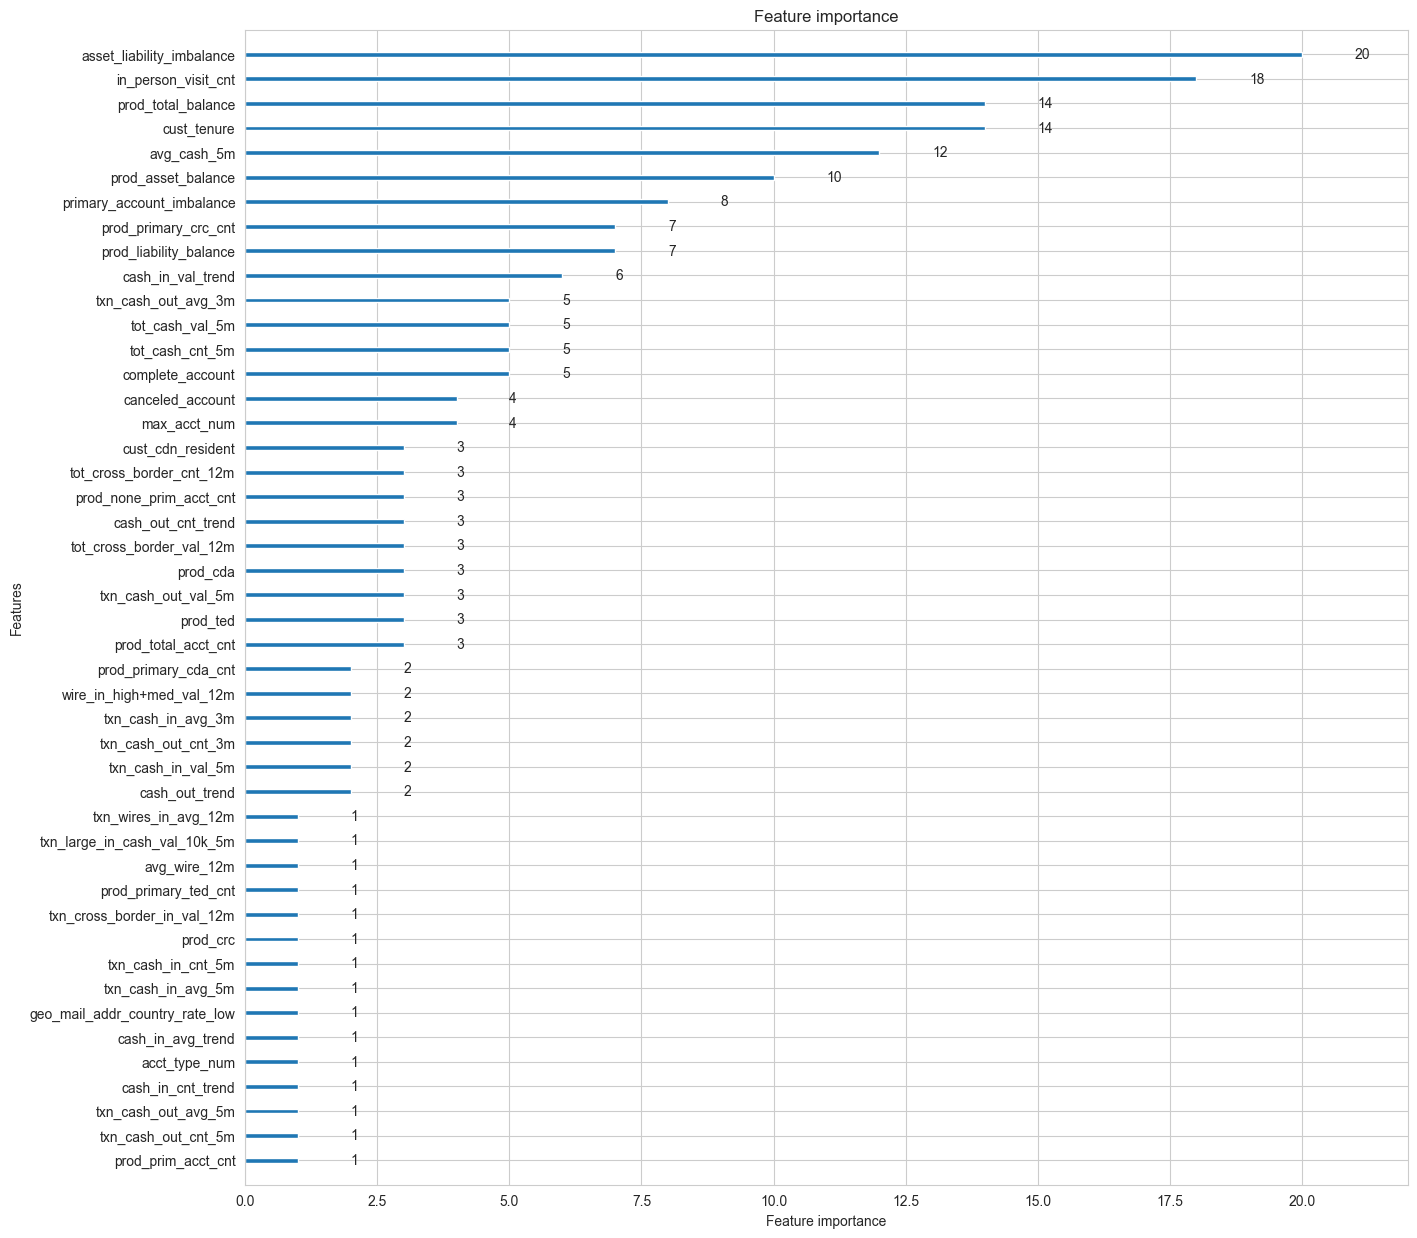

In [31]:
# plot feature importance
lgb.plot_importance(gbm, figsize=(15, 15))
plt.show()

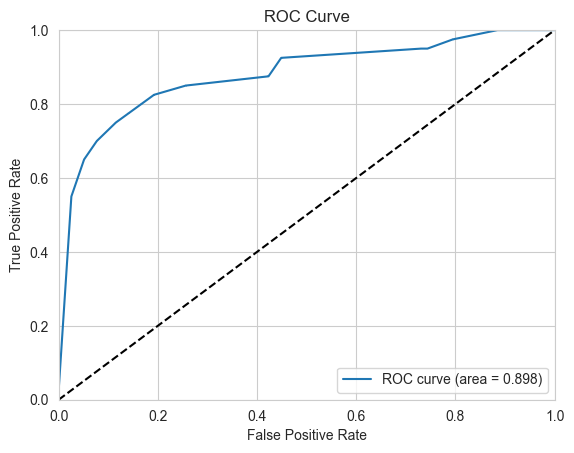

In [32]:
#plot auc plot with 45 degree line
from sklearn.metrics import roc_curve

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# apply exponential smoothing to tpr
from statsmodels.tsa.holtwinters import ExponentialSmoothing

tpr = ExponentialSmoothing(tpr).fit().fittedvalues
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Q5: model evaluation

In [37]:
from sklearn.metrics import classification_report

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = np.where(y_pred > 0.5, 1, 0)  # this threashold is adjustable
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      1.00      0.85        78
           1       1.00      0.33      0.49        40

    accuracy                           0.77       118
   macro avg       0.87      0.66      0.67       118
weighted avg       0.83      0.77      0.73       118


In [34]:
pd.DataFrame(y_pred).value_counts()

0    105
1     13
dtype: int64

# Q6 Nicola: feature correlation with the target on the training set

In [35]:
temp = pd.concat([X_train[important_features], y_train], axis=1)

In [36]:
temp.corr()['rating'].sort_values(ascending=False)[1:]

prod_primary_cda_cnt              0.303471
prod_cda                          0.284527
prod_med                          0.283339
tot_cross_border_cnt_12m          0.266825
tot_cash_val_5m                   0.241324
                                    ...   
cust_tenure                      -0.103530
occu_h                           -0.110957
prod_llc                         -0.132978
cust_cdn_resident                -0.183466
geo_mail_addr_country_rate_low   -0.194902
Name: rating, Length: 61, dtype: float64